In [246]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot') 

import warnings
warnings.filterwarnings('ignore')

# Read data

In [247]:
training = pd.read_csv('C:/Sophia/School!!!/2022 Fall Term 1/Healthcare Competition!!!/Raw data - Copy/2022_Competition_Training.csv')
training.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,hi_flag
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,NaN,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459,0
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,NaN,0


In [248]:
training.shape

(48300, 881)

In [249]:
# The data set is imbalance.
(len(training[training['hi_flag'] == 1]) / len(training[training['hi_flag'] == 0]))

0.04586202416525919

In [250]:
len(training[training['hi_flag'] == 1]) / len(training['hi_flag'])

0.04385093167701863

In [251]:
holdout = pd.read_csv('C:/Sophia/School!!!/2022 Fall Term 1/Healthcare Competition!!!/Raw data - Copy/2022_Competition_Holdout.csv')
holdout.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,100093066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.08,56707.0,0.0,0.0,0.16,0.0,5.7,1.072233
1,100313000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,83699.0,0.0,0.0,0.00,0.0,6.4,1.401754
2,100330875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,702890.0,0.0,0.0,0.00,0.0,8.9,0.489536
3,100346385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.0,0.00,1323059.0,0.0,0.0,0.25,0.0,7.7,0.780388
4,100443164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.00,285449.0,0.0,0.0,0.00,0.0,7.5,0.745321


In [252]:
holdout.shape

(12220, 880)

# Data Exploration

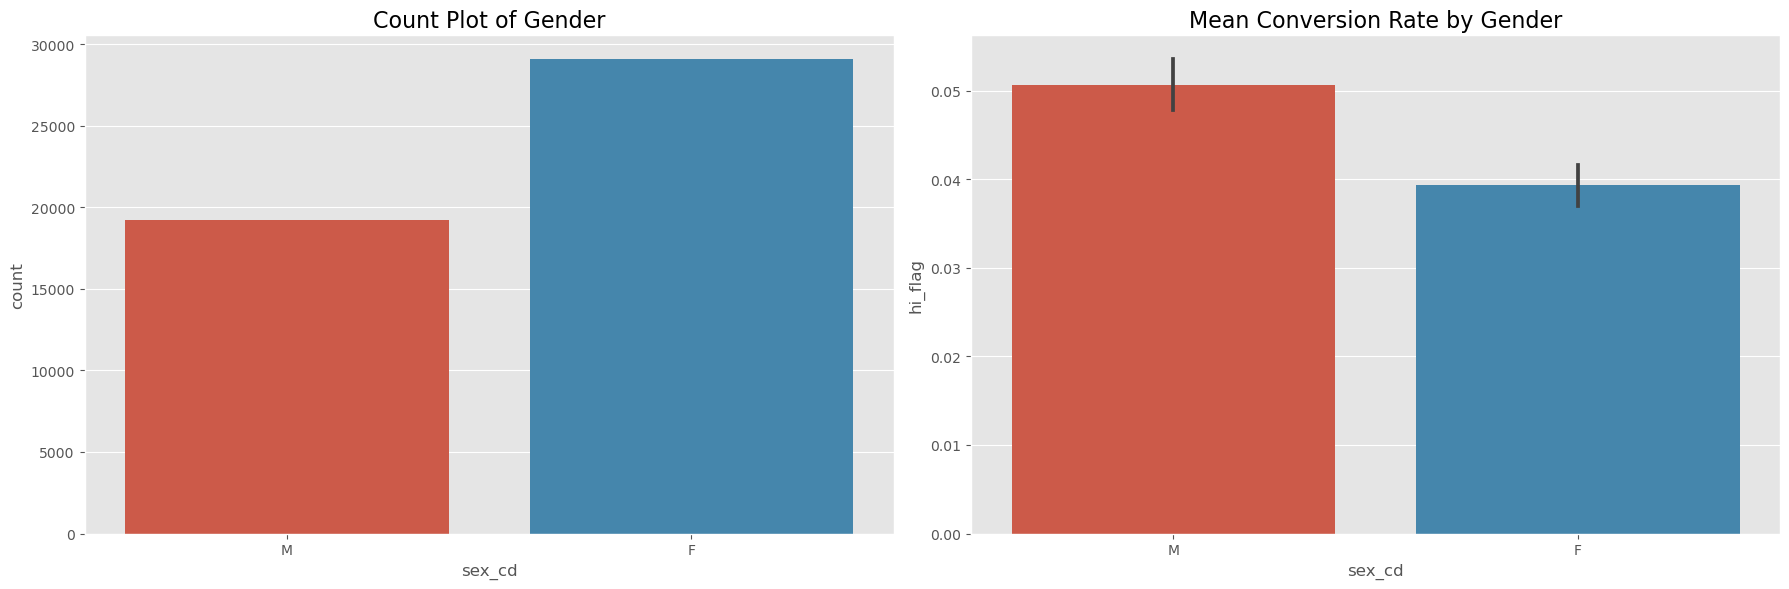

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='sex_cd', data=training, ax=ax[0])
ax[0].set_title('Count Plot of Gender', fontsize=16)

sns.barplot(x='sex_cd', y='hi_flag', data=training, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by Gender', fontsize=16)

plt.tight_layout()
plt.show()

In [254]:
training.cms_race_cd[training.cms_race_cd == '0'] = 'Unknown'
training.cms_race_cd[training.cms_race_cd == '1'] = 'White (non-Hispanic)'
training.cms_race_cd[training.cms_race_cd == '2'] = 'Black (non-Hispanic)'
training.cms_race_cd[training.cms_race_cd == '3'] = 'Other'
training.cms_race_cd[training.cms_race_cd == '4'] = 'Asian, Asian American, or Pacific Islander'
training.cms_race_cd[training.cms_race_cd == '5'] = 'Hispanic'
training.cms_race_cd[training.cms_race_cd == '6'] = 'American Indian or Alaska Native'

training.cms_race_cd[training.cms_race_cd == 0] = 'Unknown'
training.cms_race_cd[training.cms_race_cd == 1] = 'White (non-Hispanic)'
training.cms_race_cd[training.cms_race_cd == 2] = 'Black (non-Hispanic)'
training.cms_race_cd[training.cms_race_cd == 3] = 'Other'
training.cms_race_cd[training.cms_race_cd == 4] = 'Asian, Asian American, or Pacific Islander'
training.cms_race_cd[training.cms_race_cd == 5] = 'Hispanic'
training.cms_race_cd[training.cms_race_cd == 6] = 'American Indian or Alaska Native'

training.cms_race_cd[training.cms_race_cd == '*'] = 'Unknown'

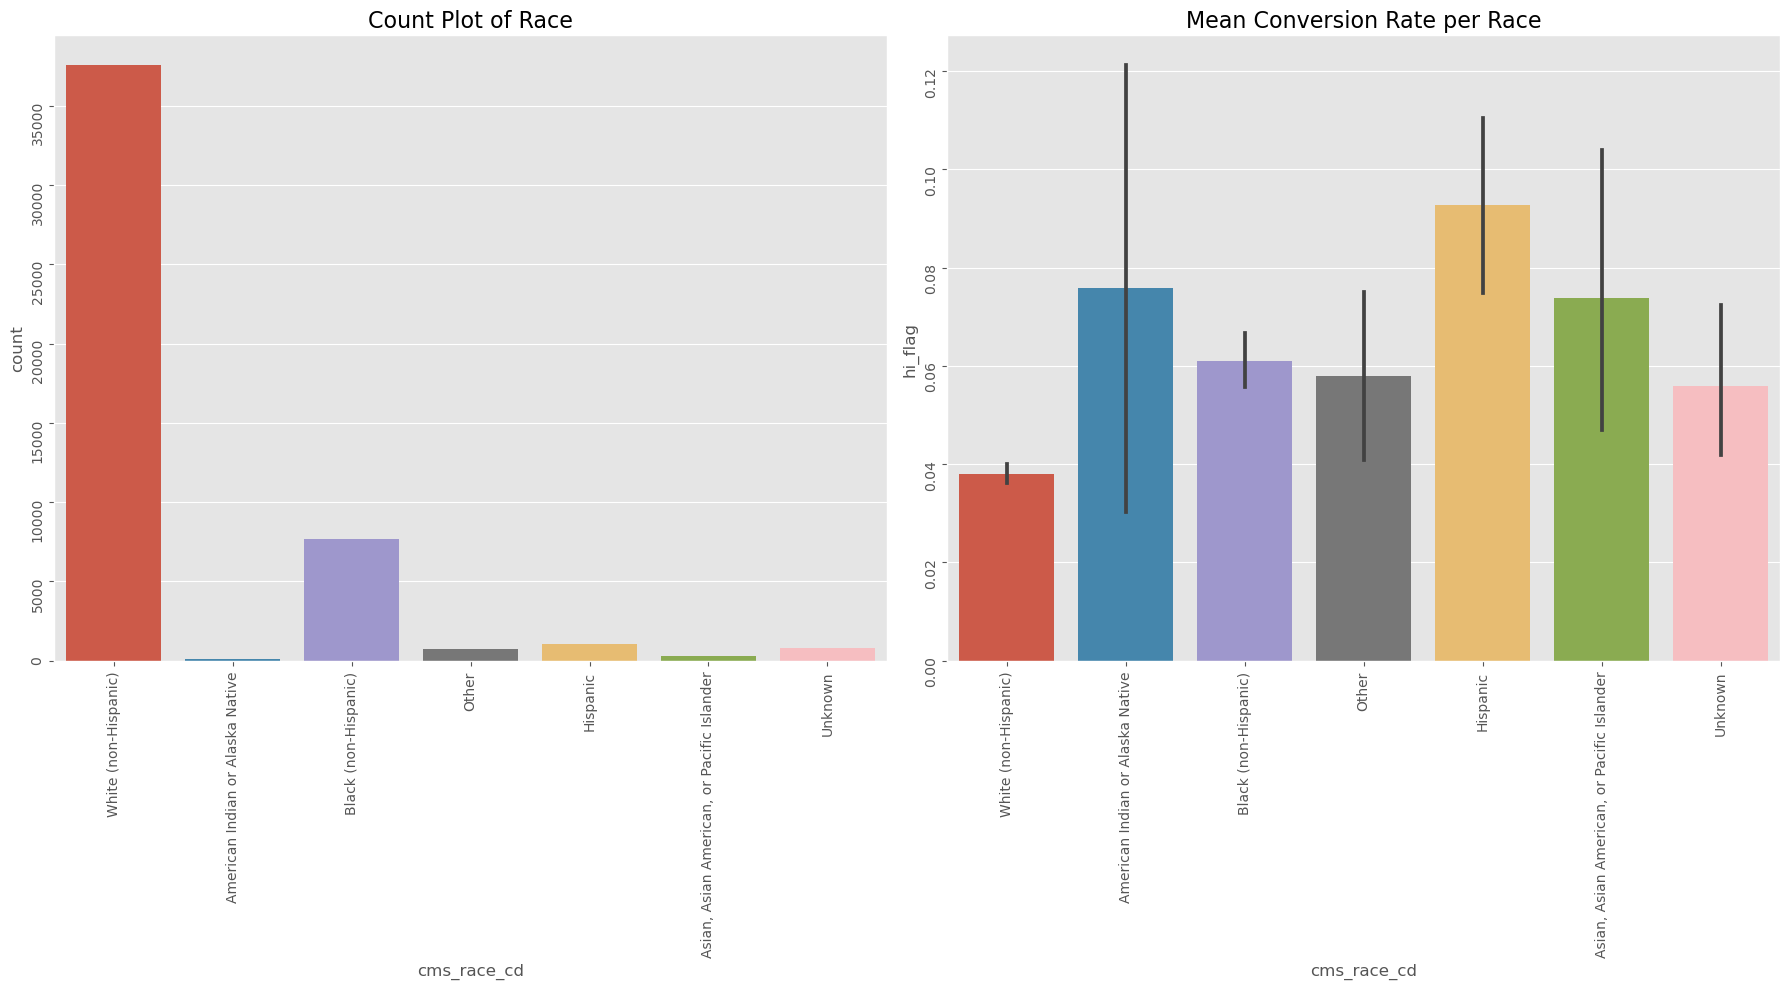

In [255]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

sns.countplot(x='cms_race_cd', data=training, ax=ax[0])
ax[0].set_title('Count Plot of Race', fontsize=16)
ax[0].tick_params(labelrotation=90)

sns.barplot(x='cms_race_cd', y='hi_flag', data=training, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Race', fontsize=16)
ax[1].tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

In [256]:
target = training['hi_flag']
training.drop(labels = ['hi_flag'], axis = 1, inplace = True)

In [257]:
training.shape

(48300, 880)

In [258]:
holdout.shape

(12220, 880)

# Data Cleaning

##### Drop useless columns

In [259]:
training = training.drop(['id'], axis=1)
holdout = holdout.drop(['id'], axis=1)

##### Remove columns that all have same values

In [260]:
nunique = training.nunique()
same_col = nunique[nunique == 1].index

training = training.drop(same_col, axis=1)

holdout = holdout.drop(same_col, axis=1)

In [261]:
training.shape

(48300, 668)

In [262]:
holdout.shape

(12220, 668)

##### Missing value

##### Drop columns that have too many missing values

In [263]:
# Missing value proportion in each column
def Missing_Counts(Data): 
    missing = Data.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace=True) 
    
    Missing_Count = pd.DataFrame({'ColumnName':missing.index, 'MissingCount':missing.values })  # Convert Series to DataFrame
    Missing_Count['Percentage(%)'] = Missing_Count['MissingCount'].apply(lambda x:round(x/Data.shape[0]*100,2) )
    return Missing_Count

In [264]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,cmsd2_eye_eye_postop_pmpm_ct,1,0.00
1,rev_pm_spcha_pmpm_cd_ct,1,0.00
2,rx_hum_64_pmpm_ct,1,0.00
3,cmsd2_ext_med_proc_compl_pmpm_ct,1,0.00
4,rx_hum_77_pmpm_ct,1,0.00
...,...,...,...
163,credit_num_autobank_new,45238,93.66
164,credit_bal_autobank_new,45243,93.67
165,credit_hh_agencyfirstmtg_new,45299,93.79
166,cms_tot_partd_payment_amt,45981,95.20


Text(0.5, 1.0, 'Distribution of Missing values proportion')

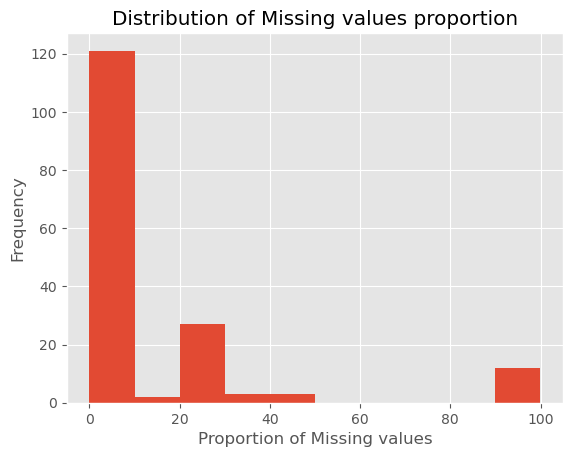

In [265]:
Missing_Counts(training)['Percentage(%)'].hist()
plt.ylabel('Frequency')
plt.xlabel('Proportion of Missing values')
plt.title('Distribution of Missing values proportion')

In [266]:
# Remove the columns that missing value proportion > 80%
missing_col = Missing_Counts(training)['ColumnName'][Missing_Counts(training)['Percentage(%)'] > 80]
# Save the columns that we want to remove to a list
missing_col = missing_col.values.tolist()

training = training.drop(columns = missing_col)

holdout = holdout.drop(columns = missing_col)

In [267]:
training.shape

(48300, 656)

In [268]:
holdout.shape

(12220, 656)

In [269]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,rx_hum_64_pmpm_ct,1,0.00
1,cmsd2_ext_med_proc_compl_pmpm_ct,1,0.00
2,cmsd2_eye_eye_postop_pmpm_ct,1,0.00
3,rx_hum_77_pmpm_ct,1,0.00
4,rev_pm_spcha_pmpm_cd_ct,1,0.00
...,...,...,...
151,lang_spoken_cd,18936,39.20
152,cms_partd_ra_factor_amt,18975,39.29
153,cms_ma_risk_score_nbr,19397,40.16
154,cms_rx_risk_score_nbr,20313,42.06


##### Inspect how are we going to fill the missing data in each column

In [270]:
# Group features into different categories
col_names = training.columns.tolist()

In [271]:
# cons_
cons_col = [name for name in col_names if name.startswith('cons_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cons_col)]

,ColumnName,MissingCount,Percentage(%)
124,cons_mobplus,11150,23.08
126,cons_stlindex,11159,23.10
127,cons_homstat,11159,23.10
128,cons_hxmboh,11159,23.10
129,cons_stlnindx,11168,23.12
130,cons_hxmioc,11172,23.13
131,cons_hxmh,11187,23.16
132,cons_ccip,11190,23.17
155,cons_lwcm10,21417,44.34


In [272]:
training[cons_col].dtypes

cons_lwcm10      float64
cons_hxmioc      float64
cons_hxmboh      float64
cons_mobplus      object
cons_stlnindx    float64
cons_ccip        float64
cons_homstat      object
cons_stlindex    float64
cons_hxmh        float64
dtype: object

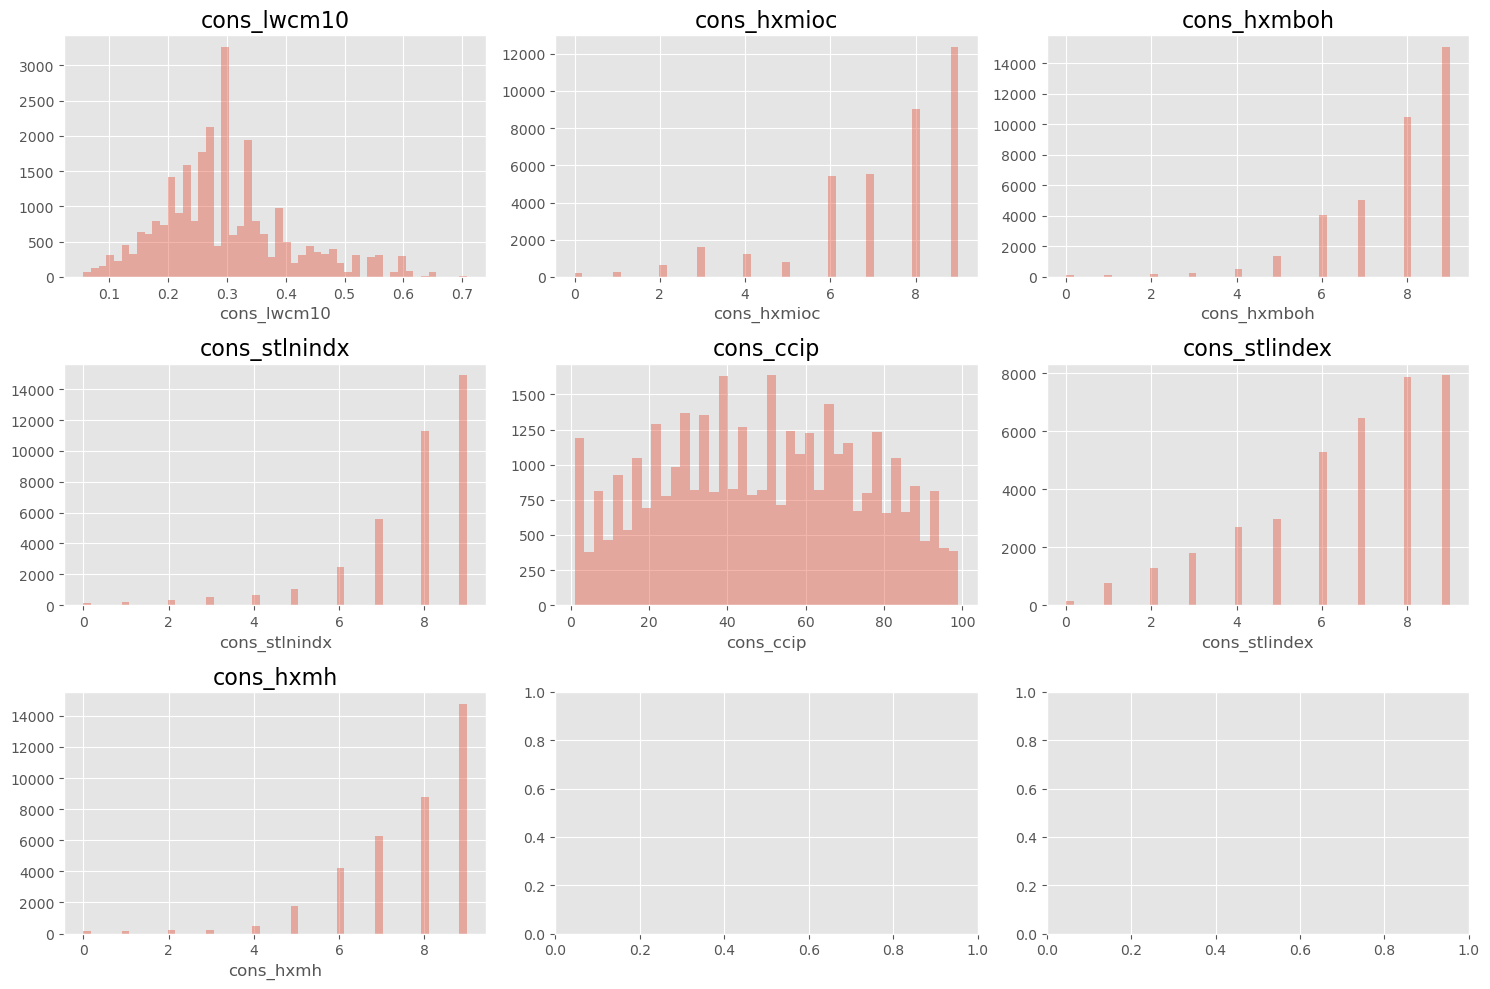

In [273]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


sns.distplot(training['cons_lwcm10'], ax=ax[0][0],kde=False)
ax[0][0].set_title('cons_lwcm10', fontsize=16)

sns.distplot(training['cons_hxmioc'],ax=ax[0][1],kde=False)
ax[0][1].set_title('cons_hxmioc', fontsize=16)

sns.distplot(training['cons_hxmboh'],ax=ax[0][2],kde=False)
ax[0][2].set_title('cons_hxmboh', fontsize=16)


sns.distplot(training['cons_stlnindx'], ax=ax[1][0],kde=False)
ax[1][0].set_title('cons_stlnindx', fontsize=16)

sns.distplot(training['cons_ccip'], ax=ax[1][1],kde=False)
ax[1][1].set_title('cons_ccip', fontsize=16)

sns.distplot(training['cons_stlindex'], ax=ax[1][2],kde=False)
ax[1][2].set_title('cons_stlindex', fontsize=16)


sns.distplot(training['cons_hxmh'], ax=ax[2][0],kde=False)
ax[2][0].set_title('cons_hxmh', fontsize=16)

plt.tight_layout()
plt.show()

In [274]:
training['cons_lwcm10'].fillna(value=training['cons_lwcm10'].median(), inplace=True)
training['cons_ccip'].fillna(value=training['cons_ccip'].median(), inplace=True)
training['cons_hxmh'].fillna(value=training['cons_hxmh'].median(), inplace=True)
training['cons_hxmioc'].fillna(value=training['cons_hxmioc'].median(), inplace=True)
training['cons_stlnindx'].fillna(value=training['cons_stlnindx'].median(), inplace=True)
training['cons_stlindex'].fillna(value=training['cons_stlindex'].median(), inplace=True)
training['cons_hxmboh'].fillna(value=training['cons_hxmboh'].median(), inplace=True)

holdout['cons_lwcm10'].fillna(value=holdout['cons_lwcm10'].median(), inplace=True)
holdout['cons_ccip'].fillna(value=holdout['cons_ccip'].median(), inplace=True)
holdout['cons_hxmh'].fillna(value=holdout['cons_hxmh'].median(), inplace=True)
holdout['cons_hxmioc'].fillna(value=holdout['cons_hxmioc'].median(), inplace=True)
holdout['cons_stlnindx'].fillna(value=holdout['cons_stlnindx'].median(), inplace=True)
holdout['cons_stlindex'].fillna(value=holdout['cons_stlindex'].median(), inplace=True)
holdout['cons_hxmboh'].fillna(value=holdout['cons_hxmboh'].median(), inplace=True)

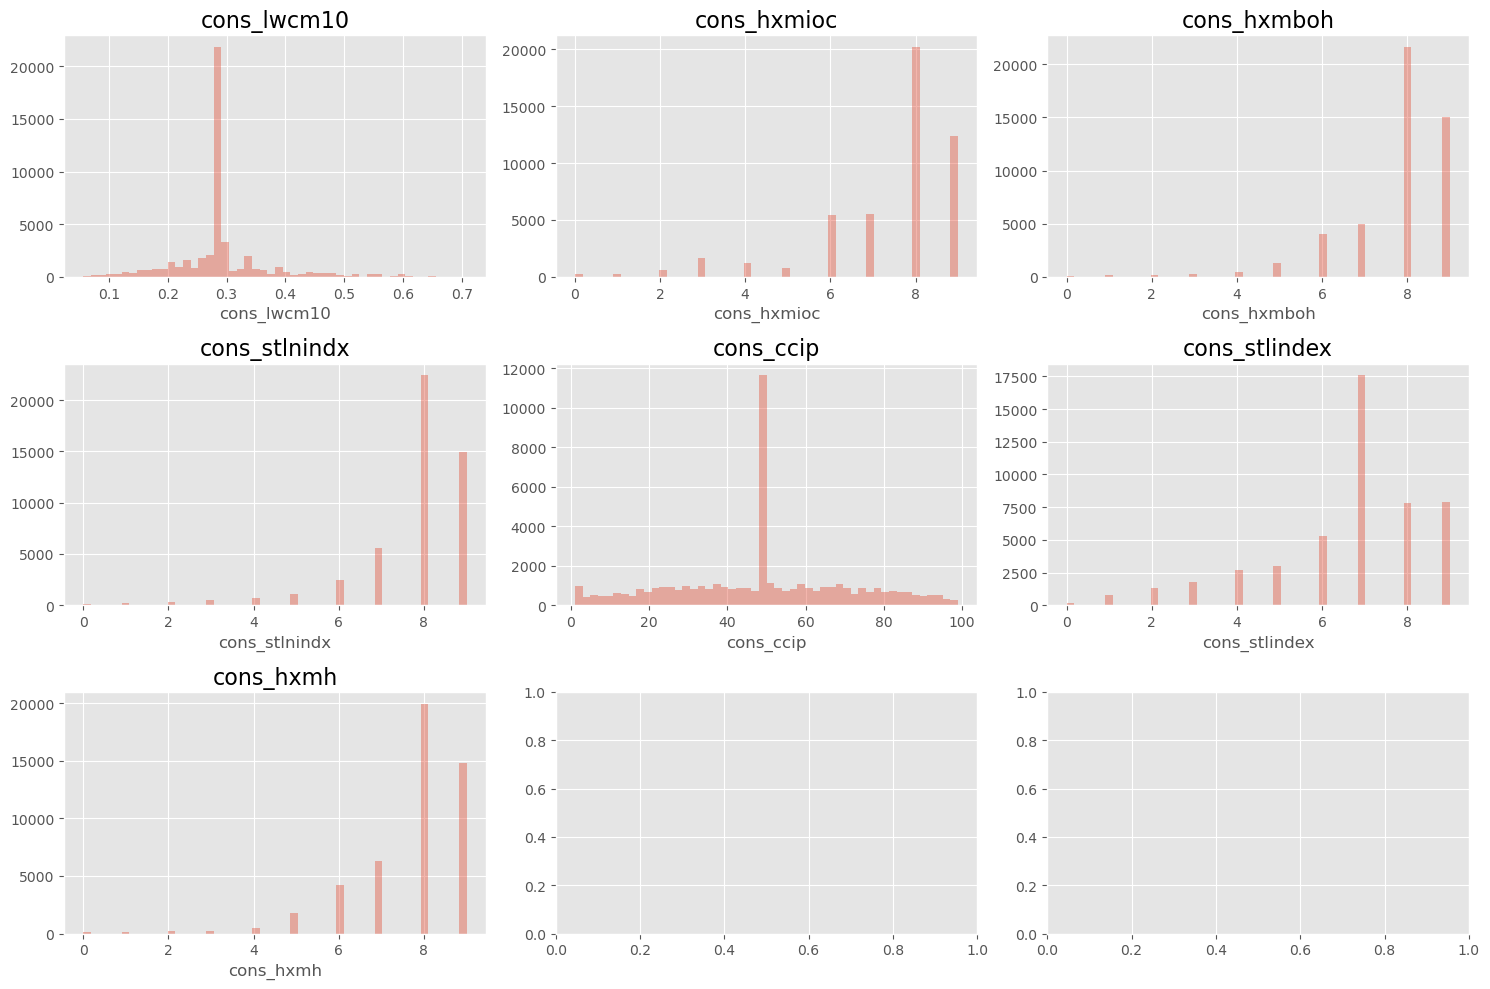

In [275]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


sns.distplot(training['cons_lwcm10'], ax=ax[0][0],kde=False)
ax[0][0].set_title('cons_lwcm10', fontsize=16)

sns.distplot(training['cons_hxmioc'],ax=ax[0][1],kde=False)
ax[0][1].set_title('cons_hxmioc', fontsize=16)

sns.distplot(training['cons_hxmboh'],ax=ax[0][2],kde=False)
ax[0][2].set_title('cons_hxmboh', fontsize=16)


sns.distplot(training['cons_stlnindx'], ax=ax[1][0],kde=False)
ax[1][0].set_title('cons_stlnindx', fontsize=16)

sns.distplot(training['cons_ccip'], ax=ax[1][1],kde=False)
ax[1][1].set_title('cons_ccip', fontsize=16)

sns.distplot(training['cons_stlindex'], ax=ax[1][2],kde=False)
ax[1][2].set_title('cons_stlindex', fontsize=16)


sns.distplot(training['cons_hxmh'], ax=ax[2][0],kde=False)
ax[2][0].set_title('cons_hxmh', fontsize=16)

plt.tight_layout()
plt.show()

M      21468
S      11653
NaN    11150
U       2940
P       1089
Name: cons_mobplus, dtype: int64


<AxesSubplot:>

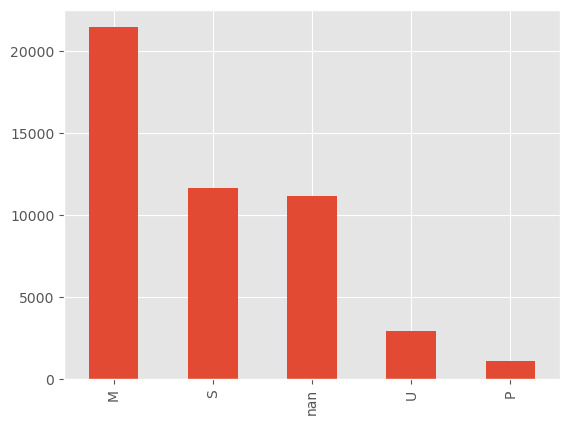

In [276]:
print(training['cons_mobplus'].value_counts(dropna=False))
training['cons_mobplus'].value_counts(dropna=False).plot(kind='bar')

In [277]:
training['cons_mobplus'].fillna('U', inplace=True)
holdout['cons_mobplus'].fillna('U', inplace=True)

M    21468
U    14090
S    11653
P     1089
Name: cons_mobplus, dtype: int64


<AxesSubplot:>

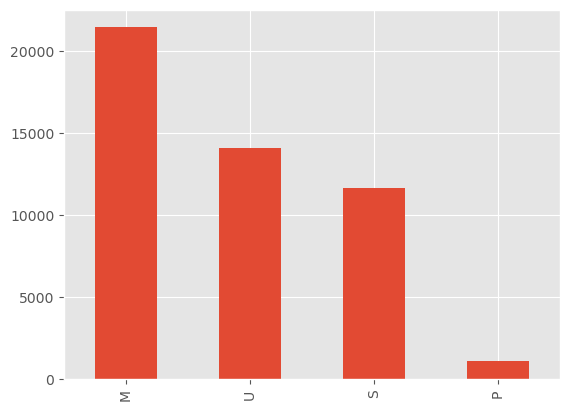

In [278]:
print(training['cons_mobplus'].value_counts(dropna=False))
training['cons_mobplus'].value_counts(dropna=False).plot(kind='bar')

Y      26743
NaN    11159
P       4269
U       3524
R       2414
T        191
Name: cons_homstat, dtype: int64


<AxesSubplot:>

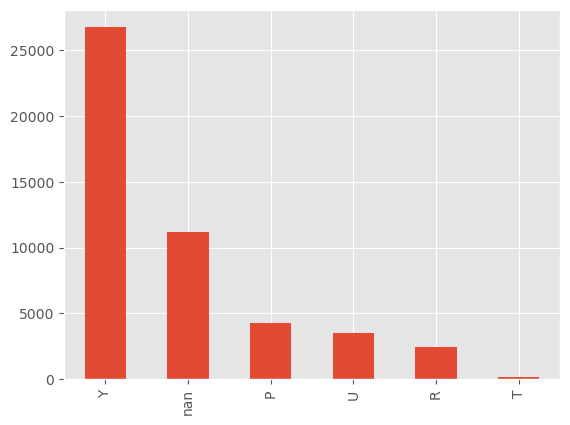

In [279]:
print(training['cons_homstat'].value_counts(dropna=False))
training['cons_homstat'].value_counts(dropna=False).plot(kind='bar')

In [280]:
training['cons_homstat'].fillna('U', inplace=True)
holdout['cons_homstat'].fillna('U', inplace=True)

In [281]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cons_col)]

,ColumnName,MissingCount,Percentage(%)


In [282]:
# atlas_
atlas_col = [name for name in col_names if name.startswith('atlas_')]

In [283]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(atlas_col)]

,ColumnName,MissingCount,Percentage(%)
116,atlas_pct_diabetes_adults13,381,0.79
117,atlas_orchard_farms12,892,1.85
124,atlas_net_international_migration_rate,11150,23.08
128,atlas_naturalchangerate1016,11638,24.10
138,atlas_snapspth16,11712,24.25


In [284]:
training[atlas_col].dtypes

atlas_naturalchangerate1016               float64
atlas_totalpopest2016                     float64
atlas_pct_diabetes_adults13               float64
atlas_net_international_migration_rate    float64
atlas_totalocchu                          float64
atlas_age65andolderpct2010                float64
atlas_orchard_farms12                     float64
atlas_totalpopacs                         float64
atlas_snapspth16                          float64
dtype: object

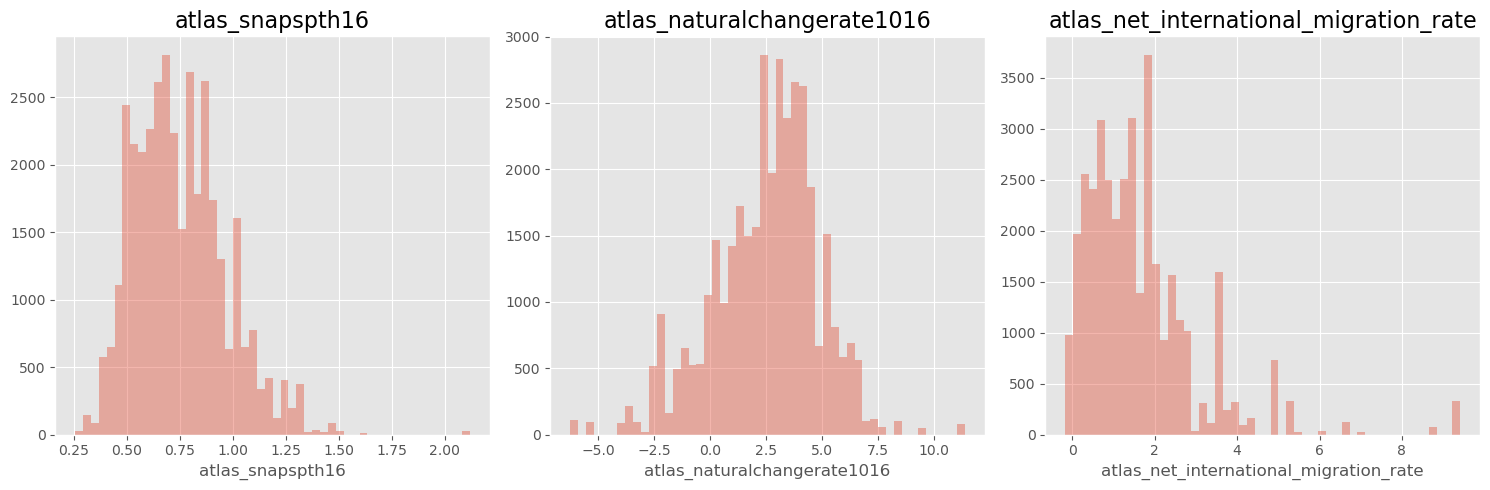

In [285]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


sns.distplot(training['atlas_snapspth16'], ax=ax[0],kde=False)
ax[0].set_title('atlas_snapspth16', fontsize=16)

sns.distplot(training['atlas_naturalchangerate1016'],ax=ax[1],kde=False)
ax[1].set_title('atlas_naturalchangerate1016', fontsize=16)

sns.distplot(training['atlas_net_international_migration_rate'],ax=ax[2],kde=False)
ax[2].set_title('atlas_net_international_migration_rate', fontsize=16)

plt.tight_layout()
plt.show()

In [286]:
# The columns exist some outliers, hence we use median to fill the missing values
training['atlas_pct_diabetes_adults13'].fillna(value=training['atlas_pct_diabetes_adults13'].median(), inplace=True)
training['atlas_orchard_farms12'].fillna(value=training['atlas_orchard_farms12'].median(), inplace=True)
training['atlas_net_international_migration_rate'].fillna(value=training['atlas_net_international_migration_rate'].median(), inplace=True)
training['atlas_naturalchangerate1016'].fillna(value=training['atlas_naturalchangerate1016'].median(), inplace=True)
training['atlas_snapspth16'].fillna(value=training['atlas_snapspth16'].median(), inplace=True)

holdout['atlas_pct_diabetes_adults13'].fillna(value=holdout['atlas_pct_diabetes_adults13'].median(), inplace=True)
holdout['atlas_orchard_farms12'].fillna(value=holdout['atlas_orchard_farms12'].median(), inplace=True)
holdout['atlas_net_international_migration_rate'].fillna(value=holdout['atlas_net_international_migration_rate'].median(), inplace=True)
holdout['atlas_naturalchangerate1016'].fillna(value=holdout['atlas_naturalchangerate1016'].median(), inplace=True)
holdout['atlas_snapspth16'].fillna(value=holdout['atlas_snapspth16'].median(), inplace=True)

In [287]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(atlas_col)]

,ColumnName,MissingCount,Percentage(%)


In [288]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,rx_hum_77_pmpm_ct,1,0.00
1,cmsd2_eye_eye_postop_pmpm_ct,1,0.00
2,cmsd2_ext_med_proc_compl_pmpm_ct,1,0.00
3,rx_hum_64_pmpm_ct,1,0.00
4,rev_pm_spcha_pmpm_cd_ct,1,0.00
...,...,...,...
137,cms_risk_adjustment_factor_a_amt,18867,39.06
138,lang_spoken_cd,18936,39.20
139,cms_partd_ra_factor_amt,18975,39.29
140,cms_ma_risk_score_nbr,19397,40.16


In [289]:
# cms_: Centers for Medicare and Medicaid Services
cms_col = [name for name in col_names if name.startswith('cms_')] 
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cms_col)]

,ColumnName,MissingCount,Percentage(%)
117,cms_orig_reas_entitle_cd,1867,3.87
118,cms_ra_factor_type_cd,2461,5.10
137,cms_risk_adjustment_factor_a_amt,18867,39.06
139,cms_partd_ra_factor_amt,18975,39.29
140,cms_ma_risk_score_nbr,19397,40.16
141,cms_rx_risk_score_nbr,20313,42.06


In [290]:
training[cms_col].dtypes

cms_disabled_ind                      int64
cms_ra_factor_type_cd                object
cms_dual_eligible_ind                 int64
cms_orig_reas_entitle_cd            float64
cms_risk_adjustment_factor_a_amt    float64
cms_low_income_ind                    int64
cms_ma_risk_score_nbr               float64
cms_partd_ra_factor_amt             float64
cms_frailty_ind                       int64
cms_race_cd                          object
cms_rx_risk_score_nbr               float64
dtype: object

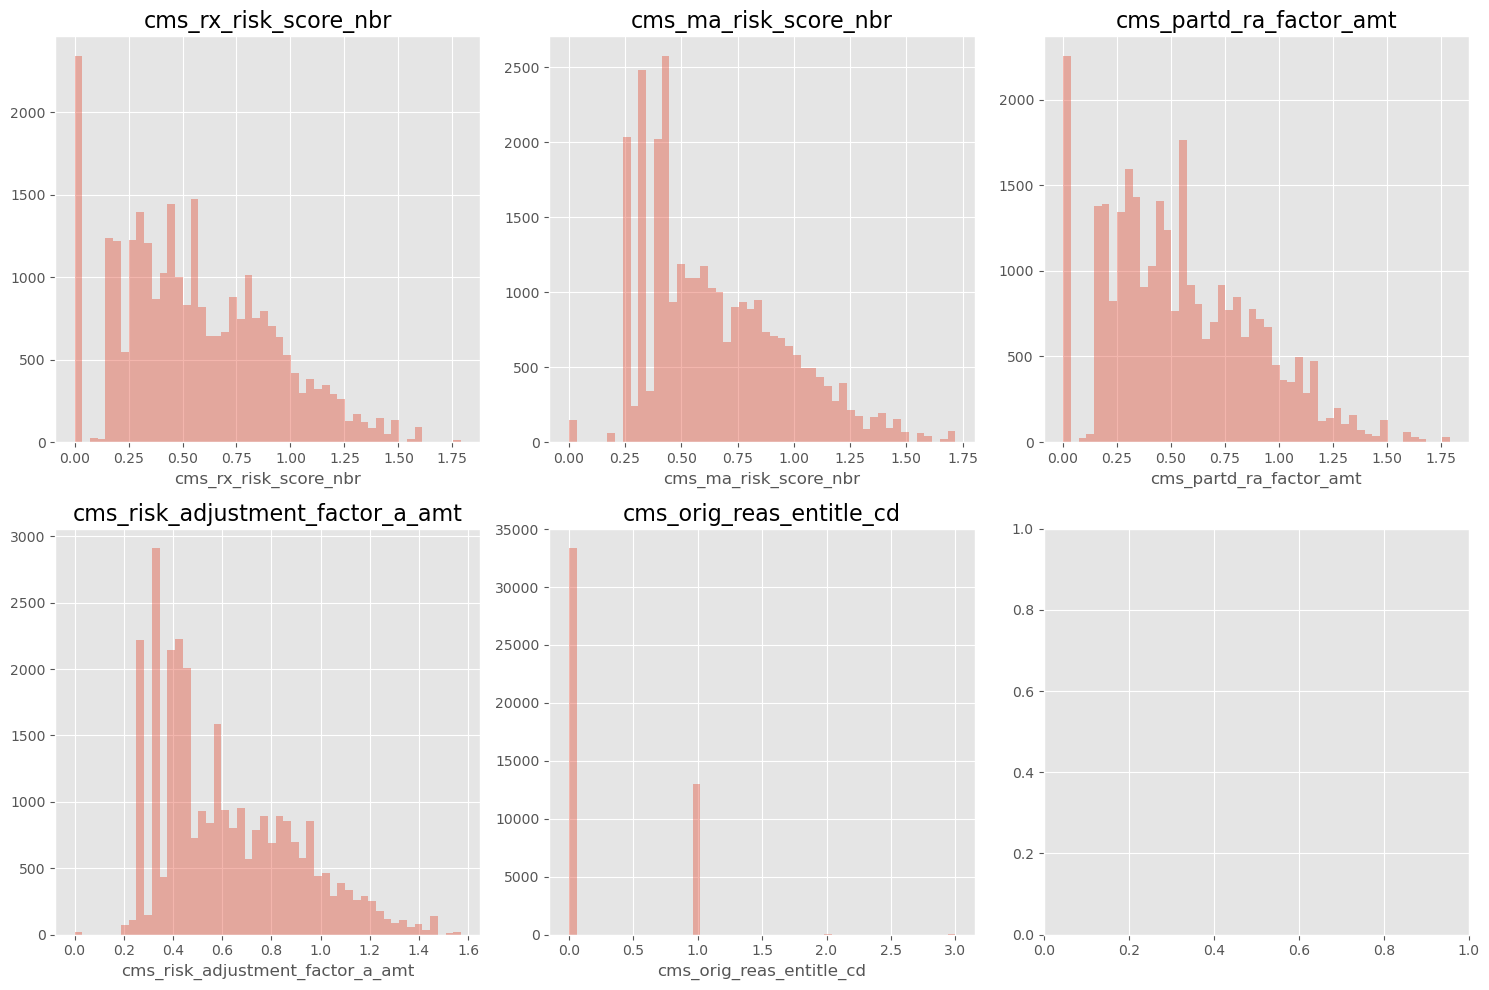

In [291]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


sns.distplot(training['cms_rx_risk_score_nbr'], ax=ax[0][0],kde=False)
ax[0][0].set_title('cms_rx_risk_score_nbr', fontsize=16)

sns.distplot(training['cms_ma_risk_score_nbr'],ax=ax[0][1],kde=False)
ax[0][1].set_title('cms_ma_risk_score_nbr', fontsize=16)

sns.distplot(training['cms_partd_ra_factor_amt'],ax=ax[0][2],kde=False)
ax[0][2].set_title('cms_partd_ra_factor_amt', fontsize=16)


sns.distplot(training['cms_risk_adjustment_factor_a_amt'], ax=ax[1][0],kde=False)
ax[1][0].set_title('cms_risk_adjustment_factor_a_amt', fontsize=16)

sns.distplot(training['cms_orig_reas_entitle_cd'], ax=ax[1][1],kde=False)
ax[1][1].set_title('cms_orig_reas_entitle_cd', fontsize=16)



plt.tight_layout()
plt.show()

In [292]:
training['cms_partd_ra_factor_amt'].fillna(value=training['cms_partd_ra_factor_amt'].median(), inplace=True)
training['cms_risk_adjustment_factor_a_amt'].fillna(value=training['cms_risk_adjustment_factor_a_amt'].median(), inplace=True)

holdout['cms_partd_ra_factor_amt'].fillna(value=holdout['cms_partd_ra_factor_amt'].median(), inplace=True)
holdout['cms_risk_adjustment_factor_a_amt'].fillna(value=holdout['cms_risk_adjustment_factor_a_amt'].median(), inplace=True)

In [293]:
print(training["cms_rx_risk_score_nbr"].value_counts(dropna=False))
training['cms_rx_risk_score_nbr'].fillna(value=0, inplace=True)

NaN      20313
0.000     2345
0.459      812
0.540      606
0.151      522
         ...  
0.224        8
0.562        8
0.993        7
1.018        7
1.380        7
Name: cms_rx_risk_score_nbr, Length: 561, dtype: int64


In [294]:
holdout['cms_rx_risk_score_nbr'].fillna(value=0, inplace=True)

In [295]:
print(training["cms_ma_risk_score_nbr"].value_counts(dropna=False))
training['cms_ma_risk_score_nbr'].fillna(value=0, inplace=True)

NaN      19397
0.325     1397
0.272     1177
0.331      943
0.379      921
         ...  
1.062        8
1.008        7
1.055        7
0.867        5
1.364        4
Name: cms_ma_risk_score_nbr, Length: 459, dtype: int64


In [296]:
holdout['cms_ma_risk_score_nbr'].fillna(value=0, inplace=True)

In [297]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cms_col)]

,ColumnName,MissingCount,Percentage(%)
117,cms_orig_reas_entitle_cd,1867,3.87
118,cms_ra_factor_type_cd,2461,5.10


In [298]:
training['cms_orig_reas_entitle_cd'].value_counts(dropna=False)

0.0    33359
1.0    13030
NaN     1867
3.0       29
2.0       15
Name: cms_orig_reas_entitle_cd, dtype: int64

In [299]:
training['cms_orig_reas_entitle_cd'].fillna(value='Others', inplace=True)

In [300]:
holdout['cms_orig_reas_entitle_cd'].fillna(value='Others', inplace=True)

In [301]:
training['cms_ra_factor_type_cd'].value_counts(dropna=False)

CN     37933
CP      3272
E       3098
NaN     2461
CF      1303
D        169
C2        23
*         21
SE        20
Name: cms_ra_factor_type_cd, dtype: int64

In [302]:
training['cms_ra_factor_type_cd'].fillna(value='No adjustment', inplace=True)
training.cms_ra_factor_type_cd[training.cms_ra_factor_type_cd == '*'] = 'No adjustment'

In [303]:
holdout['cms_ra_factor_type_cd'].fillna(value='No adjustment', inplace=True)
holdout.cms_ra_factor_type_cd[holdout.cms_ra_factor_type_cd == '*'] = 'No adjustment'

In [304]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cms_col)]

,ColumnName,MissingCount,Percentage(%)


In [305]:
# rwjf_
rwjf_col = [name for name in col_names if name.startswith('rwjf')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rwjf_col)]

,ColumnName,MissingCount,Percentage(%)
114,rwjf_air_pollute_density,332,0.69
115,rwjf_food_env_inx,370,0.77
116,rwjf_drinkwater_violate_ind,1214,2.51
117,rwjf_hiv_rate,8874,18.37
118,rwjf_preventable_ip_rate,9617,19.91
119,rwjf_std_infect_rate,10907,22.58
120,rwjf_median_house_income,11612,24.04
121,rwjf_population,11615,24.05
122,rwjf_dentists_ratio,11619,24.06
123,rwjf_poor_men_hlth_days,11639,24.10


In [306]:
training[rwjf_col].dtypes

rwjf_homicides_rate            float64
rwjf_premature_death_rate      float64
rwjf_poor_men_hlth_days        float64
rwjf_dentists_ratio            float64
rwjf_air_pollute_density       float64
rwjf_drinkwater_violate_ind    float64
rwjf_teen_births_rate          float64
rwjf_mv_deaths_rate            float64
rwjf_population                float64
rwjf_violent_crime_rate        float64
rwjf_premature_mortality       float64
rwjf_child_mortality           float64
rwjf_preventable_ip_rate       float64
rwjf_hiv_rate                  float64
rwjf_poor_phy_hlth_days        float64
rwjf_income_inequ_ratio        float64
rwjf_men_hlth_prov_ratio       float64
rwjf_std_infect_rate           float64
rwjf_median_house_income       float64
rwjf_pcp_rate                  float64
rwjf_food_env_inx              float64
dtype: object

In [307]:
training[rwjf_col].describe()

,rwjf_homicides_rate,rwjf_premature_death_rate,rwjf_poor_men_hlth_days,rwjf_dentists_ratio,rwjf_air_pollute_density,rwjf_drinkwater_violate_ind,rwjf_teen_births_rate,rwjf_mv_deaths_rate,rwjf_population,rwjf_violent_crime_rate,...,rwjf_child_mortality,rwjf_preventable_ip_rate,rwjf_hiv_rate,rwjf_poor_phy_hlth_days,rwjf_income_inequ_ratio,rwjf_men_hlth_prov_ratio,rwjf_std_infect_rate,rwjf_median_house_income,rwjf_pcp_rate,rwjf_food_env_inx
count,36023.000000,36656.000000,36661.000000,36681.000000,47968.000000,47086.000000,36649.000000,36644.000000,3.668500e+04,36453.000000,...,36532.000000,38683.000000,39426.000000,36620.000000,36621.000000,36617.000000,37393.000000,36688.000000,36605.000000,47930.000000
mean,6.768214,7596.025074,4.510222,0.000676,8.484248,0.509599,23.139358,12.281826,1.000528e+06,425.565826,...,53.156908,44.211170,364.495181,4.120381,4.620906,0.002281,566.070470,63925.108101,0.000757,7.678571
std,4.729796,1917.260922,0.501978,0.000238,1.641422,0.499913,8.887853,4.930594,1.504927e+06,228.676969,...,13.892353,10.405783,298.653909,0.515294,0.611022,0.001286,232.027421,14272.392620,0.000268,0.806071
min,0.602959,3429.914300,3.109904,0.000000,3.500000,0.000000,3.298107,2.466701,1.465100e+04,33.000134,...,21.332829,16.210000,25.500000,2.560741,3.097365,0.000030,79.000000,34583.000000,0.000082,2.800000
25%,3.592984,6270.269500,4.135203,0.000519,7.500000,0.000000,16.805761,9.010092,1.814510e+05,261.455900,...,44.344260,38.030000,157.200000,3.845107,4.232312,0.001351,394.400000,54242.000000,0.000569,7.200000
50%,5.564374,7314.941400,4.482740,0.000682,8.500000,1.000000,22.500000,11.753143,4.400590e+05,399.615000,...,51.442330,44.840000,279.100000,4.150197,4.525509,0.002047,562.400000,61429.000000,0.000733,7.700000
75%,8.206910,8944.404000,4.876664,0.000812,9.500000,1.000000,28.513357,14.584155,1.047279e+06,560.254500,...,60.489742,50.750000,469.500000,4.439330,4.887713,0.002987,688.200000,69455.000000,0.000921,8.200000
max,40.966194,16913.389000,6.178428,0.002099,16.000000,1.000000,60.360360,46.772686,1.000000e+07,1819.514400,...,105.926300,91.550000,2357.000000,6.469784,9.146812,0.009008,1421.800000,127898.000000,0.001757,9.700000


In [308]:
training['rwjf_homicides_rate'].fillna(value=training['rwjf_homicides_rate'].median(), inplace=True)
training['rwjf_violent_crime_rate'].fillna(value=training['rwjf_violent_crime_rate'].median(), inplace=True)
training['rwjf_child_mortality'].fillna(value=training['rwjf_child_mortality'].median(), inplace=True)
training['rwjf_pcp_rate'].fillna(value=training['rwjf_pcp_rate'].median(), inplace=True)
training['rwjf_men_hlth_prov_ratio'].fillna(value=training['rwjf_men_hlth_prov_ratio'].median(), inplace=True)
training['rwjf_poor_phy_hlth_days'].fillna(value=training['rwjf_poor_phy_hlth_days'].median(), inplace=True)
training['rwjf_income_inequ_ratio'].fillna(value=training['rwjf_income_inequ_ratio'].median(), inplace=True)
training['rwjf_premature_mortality'].fillna(value=training['rwjf_premature_mortality'].median(), inplace=True)
training['rwjf_mv_deaths_rate'].fillna(value=training['rwjf_mv_deaths_rate'].median(), inplace=True)
training['rwjf_teen_births_rate'].fillna(value=training['rwjf_teen_births_rate'].median(), inplace=True)
training['rwjf_premature_death_rate'].fillna(value=training['rwjf_premature_death_rate'].median(), inplace=True)
training['rwjf_poor_men_hlth_days'].fillna(value=training['rwjf_poor_men_hlth_days'].median(), inplace=True)
training['rwjf_dentists_ratio'].fillna(value=training['rwjf_dentists_ratio'].median(), inplace=True)
training['rwjf_population'].fillna(value=training['rwjf_population'].median(), inplace=True)
training['rwjf_median_house_income'].fillna(value=training['rwjf_median_house_income'].median(), inplace=True)
training['rwjf_std_infect_rate'].fillna(value=training['rwjf_std_infect_rate'].median(), inplace=True)
training['rwjf_preventable_ip_rate'].fillna(value=training['rwjf_preventable_ip_rate'].median(), inplace=True)
training['rwjf_hiv_rate'].fillna(value=training['rwjf_hiv_rate'].median(), inplace=True)
training['rwjf_food_env_inx'].fillna(value=training['rwjf_food_env_inx'].median(), inplace=True)
training['rwjf_air_pollute_density'].fillna(value=training['rwjf_air_pollute_density'].median(), inplace=True)

holdout['rwjf_homicides_rate'].fillna(value=holdout['rwjf_homicides_rate'].median(), inplace=True)
holdout['rwjf_violent_crime_rate'].fillna(value=holdout['rwjf_violent_crime_rate'].median(), inplace=True)
holdout['rwjf_child_mortality'].fillna(value=holdout['rwjf_child_mortality'].median(), inplace=True)
holdout['rwjf_pcp_rate'].fillna(value=holdout['rwjf_pcp_rate'].median(), inplace=True)
holdout['rwjf_men_hlth_prov_ratio'].fillna(value=holdout['rwjf_men_hlth_prov_ratio'].median(), inplace=True)
holdout['rwjf_poor_phy_hlth_days'].fillna(value=holdout['rwjf_poor_phy_hlth_days'].median(), inplace=True)
holdout['rwjf_income_inequ_ratio'].fillna(value=holdout['rwjf_income_inequ_ratio'].median(), inplace=True)
holdout['rwjf_premature_mortality'].fillna(value=holdout['rwjf_premature_mortality'].median(), inplace=True)
holdout['rwjf_mv_deaths_rate'].fillna(value=holdout['rwjf_mv_deaths_rate'].median(), inplace=True)
holdout['rwjf_teen_births_rate'].fillna(value=holdout['rwjf_teen_births_rate'].median(), inplace=True)
holdout['rwjf_premature_death_rate'].fillna(value=holdout['rwjf_premature_death_rate'].median(), inplace=True)
holdout['rwjf_poor_men_hlth_days'].fillna(value=holdout['rwjf_poor_men_hlth_days'].median(), inplace=True)
holdout['rwjf_dentists_ratio'].fillna(value=holdout['rwjf_dentists_ratio'].median(), inplace=True)
holdout['rwjf_population'].fillna(value=holdout['rwjf_population'].median(), inplace=True)
holdout['rwjf_median_house_income'].fillna(value=holdout['rwjf_median_house_income'].median(), inplace=True)
holdout['rwjf_std_infect_rate'].fillna(value=holdout['rwjf_std_infect_rate'].median(), inplace=True)
holdout['rwjf_preventable_ip_rate'].fillna(value=holdout['rwjf_preventable_ip_rate'].median(), inplace=True)
holdout['rwjf_hiv_rate'].fillna(value=holdout['rwjf_hiv_rate'].median(), inplace=True)
holdout['rwjf_food_env_inx'].fillna(value=holdout['rwjf_food_env_inx'].median(), inplace=True)
holdout['rwjf_air_pollute_density'].fillna(value=holdout['rwjf_air_pollute_density'].median(), inplace=True)

In [309]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rwjf_col)]

,ColumnName,MissingCount,Percentage(%)
114,rwjf_drinkwater_violate_ind,1214,2.51


In [310]:
training['rwjf_drinkwater_violate_ind'].value_counts(dropna=False)

1.0    23995
0.0    23091
NaN     1214
Name: rwjf_drinkwater_violate_ind, dtype: int64

In [311]:
training['rwjf_drinkwater_violate_ind'].fillna(value='Unknown', inplace=True)

In [312]:
holdout['rwjf_drinkwater_violate_ind'].fillna(value='Unknown', inplace=True)

In [313]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rwjf_col)]

,ColumnName,MissingCount,Percentage(%)


In [314]:
training['lang_spoken_cd'].value_counts(dropna=False)

ENG    28285
NaN    18936
SPA     1069
*         10
Name: lang_spoken_cd, dtype: int64

In [315]:
training.lang_spoken_cd[training.lang_spoken_cd == '*'] = 'Unknown'
training['lang_spoken_cd'].fillna(value='Unknown', inplace=True)

In [316]:
training['lang_spoken_cd'].value_counts(dropna=False)

ENG        28285
Unknown    18946
SPA         1069
Name: lang_spoken_cd, dtype: int64

In [317]:
holdout['lang_spoken_cd'].value_counts(dropna=False)

ENG    7099
NaN    4849
SPA     270
*         2
Name: lang_spoken_cd, dtype: int64

In [318]:
holdout['lang_spoken_cd'] = holdout['lang_spoken_cd'].replace('*', 'Unknown')
holdout['lang_spoken_cd'].fillna(value='Unknown', inplace=True)

In [319]:
holdout['lang_spoken_cd'].value_counts(dropna=False)

ENG        7099
Unknown    4851
SPA         270
Name: lang_spoken_cd, dtype: int64

In [320]:
# cmsd2_: level 2 diagnosis categories
cmsd2_col = [name for name in col_names if name.startswith('cmsd2_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cmsd2_col)]

,ColumnName,MissingCount,Percentage(%)
1,cmsd2_eye_eye_postop_pmpm_ct,1,0.00
2,cmsd2_ext_med_proc_compl_pmpm_ct,1,0.00
6,cmsd2_men_men_other_pmpm_ct,2,0.00
7,cmsd2_ner_cns_inf_pmpm_ct,2,0.00
10,cmsd2_skn_bullous_pmpm_ct,3,0.01
12,cmsd2_inf_infestation_pmpm_ct,3,0.01
14,cmsd2_inf_sti_pmpm_ct,4,0.01
16,cmsd2_vco_resistance_pmpm_ct,4,0.01
17,cmsd2_gus_glomerular_pmpm_ct,4,0.01
19,cmsd2_vco_repro_pmpm_ct,5,0.01


In [321]:
training['cmsd2_ext_med_proc_compl_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_eye_eye_postop_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_men_men_other_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ner_cns_inf_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inf_infestation_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_skn_bullous_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_res_res_postop_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ano_mus_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_can_mal_end_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_eye_optic_nerve_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ano_urinary_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_mus_arthropath_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inf_infectious_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_men_men_adult_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_other_land_transport_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_car_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_can_mal_meso/sft_tissue_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ner_cns_atrophy_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_gus_genital_postop_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_can_mal_eye/brain/cns_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_inanimate_mech_force_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_can_mal_oral_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_nature_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_acc_exposure_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inj_burns_ext_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_animate_mech_force_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_vco_genetic_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ext_overexertion_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inj_foreign_body_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inf_parasitic_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_mus_jaw_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inj_substances_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ano_ano_other_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_mus_mus_other_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ano_dig_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_vco_dnr_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_ano_eye/ear/face/neck_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_skn_skn_postop_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inj_inj_mult_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_vco_repro_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_gus_glomerular_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_vco_resistance_pmpm_ct'].fillna(value=0, inplace=True)
training['cmsd2_inf_sti_pmpm_ct'].fillna(value=0, inplace=True)

holdout['cmsd2_ext_med_proc_compl_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_eye_eye_postop_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_men_men_other_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ner_cns_inf_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inf_infestation_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_skn_bullous_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_res_res_postop_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ano_mus_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_can_mal_end_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_eye_optic_nerve_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ano_urinary_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_mus_arthropath_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inf_infectious_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_men_men_adult_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_other_land_transport_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_car_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_can_mal_meso/sft_tissue_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ner_cns_atrophy_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_gus_genital_postop_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_can_mal_eye/brain/cns_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_inanimate_mech_force_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_can_mal_oral_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_nature_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_acc_exposure_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inj_burns_ext_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_animate_mech_force_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_vco_genetic_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ext_overexertion_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inj_foreign_body_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inf_parasitic_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_mus_jaw_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inj_substances_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ano_ano_other_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_mus_mus_other_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ano_dig_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_vco_dnr_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_ano_eye/ear/face/neck_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_skn_skn_postop_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inj_inj_mult_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_vco_repro_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_gus_glomerular_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_vco_resistance_pmpm_ct'].fillna(value=0, inplace=True)
holdout['cmsd2_inf_sti_pmpm_ct'].fillna(value=0, inplace=True)

In [322]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cmsd2_col)]

,ColumnName,MissingCount,Percentage(%)


In [323]:
# bh_: behavioral health categories
bh_col = [name for name in col_names if name.startswith('bh_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(bh_col)]

,ColumnName,MissingCount,Percentage(%)
7,bh_ndot_pmpm_ct,4,0.01
12,bh_otic_pmpm_ct,8,0.02
15,bh_ncti_pmpm_ct,9,0.02
23,bh_apho_pmpm_ct,12,0.02
35,bh_otso_pmpm_ct,19,0.04
38,bh_otot_pmpm_ct,19,0.04
41,bh_atot_pmpm_ct,24,0.05
54,bh_psot_pmpm_ct,36,0.07
62,bh_otpr_pmpm_ct,45,0.09
66,bh_otsd_pmpm_ct,52,0.11


In [324]:
training[bh_col].dtypes

bh_cdsb_pmpm_ct                          float64
bh_ncal_pmpm_ct                          float64
bh_ambulance_visit_ct_pmpm               float64
bh_otic_pmpm_ct                          float64
bh_apan_pmpm_ct                          float64
bh_otsd_pmpm_ct                          float64
bh_ambulance_allowed_pmpm_cost           float64
bh_suid_pmpm_ct                          float64
bh_otot_pmpm_ct                          float64
bh_ip_mhsa_allowed_pmpm_cost             float64
bh_physician_office_allowed_pmpm_cost    float64
bh_cdal_pmpm_ct                          float64
bh_agad_pmpm_ct                          float64
bh_psot_pmpm_ct                          float64
bh_dema_pmpm_ct                          float64
bh_cdto_pmpm_ct                          float64
bh_bipr_pmpm_ct                          float64
bh_aoth_pmpm_ct                          float64
bh_outpatient_allowed_pmpm_cost          float64
bh_otpr_pmpm_ct                          float64
bh_otel_pmpm_ct     

In [325]:
training['bh_ndot_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_otic_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_ncti_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_apho_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_otso_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_otot_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_atot_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_psot_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_otpr_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_otsd_pmpm_ct'].fillna(value=0, inplace=True)
training['bh_ambulance_visit_ct_pmpm'].fillna(value=0, inplace=True)

holdout['bh_ndot_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_otic_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_ncti_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_apho_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_otso_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_otot_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_atot_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_psot_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_otpr_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_otsd_pmpm_ct'].fillna(value=0, inplace=True)
holdout['bh_ambulance_visit_ct_pmpm'].fillna(value=0, inplace=True)

In [326]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(bh_col)]

,ColumnName,MissingCount,Percentage(%)


In [327]:
# cnt_
cnt_col = [name for name in col_names if name.startswith('cnt_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cnt_col)]

,ColumnName,MissingCount,Percentage(%)
5,cnt_cp_print_4,3,0.01
6,cnt_cp_print_11,3,0.01
8,cnt_cp_print_5,5,0.01
11,cnt_cp_print_8,8,0.02
14,cnt_cp_print_1,10,0.02
16,cnt_cp_emails_11,11,0.02
17,cnt_cp_emails_10,11,0.02
18,cnt_cp_print_10,11,0.02
20,cnt_cp_emails_6,13,0.03
21,cnt_cp_print_9,14,0.03


In [328]:
training[cnt_col].dtypes

cnt_cp_print_0                 float64
cnt_cp_webstatement_5            int64
cnt_cp_emails_9                float64
cnt_cp_webstatement_11           int64
cnt_cp_print_1                 float64
cnt_cp_webstatement_0            int64
cnt_cp_emails_0                float64
cnt_cp_webstatement_2            int64
cnt_cp_print_7                 float64
cnt_cp_vat_0                   float64
cnt_cp_emails_5                float64
cnt_cp_webstatement_1            int64
cnt_cp_webstatement_pmpm_ct    float64
cnt_cp_print_8                 float64
cnt_cp_vat_11                  float64
cnt_cp_vat_pmpm_ct             float64
cnt_cp_webstatement_8            int64
cnt_cp_vat_5                   float64
cnt_cp_emails_8                float64
cnt_cp_vat_6                   float64
cnt_cp_vat_1                   float64
cnt_cp_vat_9                   float64
cnt_cp_print_2                 float64
cnt_cp_webstatement_7            int64
cnt_cp_emails_7                float64
cnt_cp_emails_pmpm_ct    

In [329]:
training['cnt_cp_vat_0'].fillna(value=0, inplace=True)
training['cnt_cp_vat_1'].fillna(value=0, inplace=True)
training['cnt_cp_vat_2'].fillna(value=0, inplace=True)
training['cnt_cp_vat_3'].fillna(value=0, inplace=True)
training['cnt_cp_vat_4'].fillna(value=0, inplace=True)
training['cnt_cp_vat_5'].fillna(value=0, inplace=True)
training['cnt_cp_vat_6'].fillna(value=0, inplace=True)
training['cnt_cp_vat_7'].fillna(value=0, inplace=True)
training['cnt_cp_vat_8'].fillna(value=0, inplace=True)
training['cnt_cp_vat_9'].fillna(value=0, inplace=True)
training['cnt_cp_vat_10'].fillna(value=0, inplace=True)
training['cnt_cp_vat_11'].fillna(value=0, inplace=True)

holdout['cnt_cp_vat_0'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_1'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_2'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_3'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_4'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_5'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_6'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_7'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_8'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_9'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_10'].fillna(value=0, inplace=True)
holdout['cnt_cp_vat_11'].fillna(value=0, inplace=True)

In [330]:
training['cnt_cp_emails_0'].fillna(value=0, inplace=True)
training['cnt_cp_emails_1'].fillna(value=0, inplace=True)
training['cnt_cp_emails_2'].fillna(value=0, inplace=True)
training['cnt_cp_emails_3'].fillna(value=0, inplace=True)
training['cnt_cp_emails_4'].fillna(value=0, inplace=True)
training['cnt_cp_emails_5'].fillna(value=0, inplace=True)
training['cnt_cp_emails_6'].fillna(value=0, inplace=True)
training['cnt_cp_emails_7'].fillna(value=0, inplace=True)
training['cnt_cp_emails_8'].fillna(value=0, inplace=True)
training['cnt_cp_emails_9'].fillna(value=0, inplace=True)
training['cnt_cp_emails_10'].fillna(value=0, inplace=True)
training['cnt_cp_emails_11'].fillna(value=0, inplace=True)

holdout['cnt_cp_emails_0'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_1'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_2'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_3'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_4'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_5'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_6'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_7'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_8'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_9'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_10'].fillna(value=0, inplace=True)
holdout['cnt_cp_emails_11'].fillna(value=0, inplace=True)

In [331]:
training['cnt_cp_print_0'].fillna(value=0, inplace=True)
training['cnt_cp_print_1'].fillna(value=0, inplace=True)
training['cnt_cp_print_2'].fillna(value=0, inplace=True)
training['cnt_cp_print_3'].fillna(value=0, inplace=True)
training['cnt_cp_print_4'].fillna(value=0, inplace=True)
training['cnt_cp_print_5'].fillna(value=0, inplace=True)
training['cnt_cp_print_6'].fillna(value=0, inplace=True)
training['cnt_cp_print_7'].fillna(value=0, inplace=True)
training['cnt_cp_print_8'].fillna(value=0, inplace=True)
training['cnt_cp_print_9'].fillna(value=0, inplace=True)
training['cnt_cp_print_10'].fillna(value=0, inplace=True)
training['cnt_cp_print_11'].fillna(value=0, inplace=True)

holdout['cnt_cp_print_0'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_1'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_2'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_3'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_4'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_5'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_6'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_7'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_8'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_9'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_10'].fillna(value=0, inplace=True)
holdout['cnt_cp_print_11'].fillna(value=0, inplace=True)

In [332]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(cnt_col)]

,ColumnName,MissingCount,Percentage(%)


In [333]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,rx_hum_77_pmpm_ct,1,0.00
1,rx_hum_64_pmpm_ct,1,0.00
2,rev_pm_spcha_pmpm_cd_ct,1,0.00
3,total_ip_mhsa_admit_ct_pmpm,2,0.00
4,rev_pm_traum_pmpm_cd_ct,2,0.00
5,total_er_obs_ct_pmpm,4,0.01
6,rx_hum_00_pmpm_ct,7,0.01
7,total_ip_rehab_admit_ct_pmpm,7,0.01
8,rev_pm_excl_pmpm_cd_ct,8,0.02
9,dcsi_score,9,0.02


In [334]:
# rx_hum_
rx_hum_col = [name for name in col_names if name.startswith('rx_hum_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rx_hum_col)]

,ColumnName,MissingCount,Percentage(%)
0,rx_hum_77_pmpm_ct,1,0.00
1,rx_hum_64_pmpm_ct,1,0.00
6,rx_hum_00_pmpm_ct,7,0.01
12,rx_hum_77_pmpm_cost,15,0.03
14,rx_hum_30_pmpm_ct,29,0.06
15,rx_hum_26_pmpm_ct,30,0.06
16,rx_hum_18_pmpm_ct,34,0.07
17,rx_hum_41_pmpm_ct,37,0.08
18,rx_hum_57_pmpm_ct,43,0.09
21,rx_hum_10_pmpm_ct,46,0.10


In [335]:
training[rx_hum_col].dtypes

rx_hum_19_pmpm_cost    float64
rx_hum_28_pmpm_ct      float64
rx_hum_11_pmpm_cost    float64
rx_hum_09_pmpm_ct      float64
rx_hum_10_pmpm_ct      float64
                        ...   
rx_hum_88_pmpm_cost    float64
rx_hum_66_pmpm_ct      float64
rx_hum_77_pmpm_cost    float64
rx_hum_51_pmpm_ct      float64
rx_hum_87_pmpm_ct      float64
Length: 133, dtype: object

In [336]:
training[rx_hum_col].describe()

,rx_hum_19_pmpm_cost,rx_hum_28_pmpm_ct,rx_hum_11_pmpm_cost,rx_hum_09_pmpm_ct,rx_hum_10_pmpm_ct,rx_hum_81_pmpm_cost,rx_hum_61_pmpm_ct,rx_hum_22_pmpm_cost,rx_hum_50_pmpm_cost,rx_hum_04_pmpm_cost,...,rx_hum_57_pmpm_cost,rx_hum_33_pmpm_cost,rx_hum_69_pmpm_cost,rx_hum_87_pmpm_cost,rx_hum_29_pmpm_cost,rx_hum_88_pmpm_cost,rx_hum_66_pmpm_ct,rx_hum_77_pmpm_cost,rx_hum_51_pmpm_ct,rx_hum_87_pmpm_ct
count,48300.000000,48300.000000,48300.000000,48300.000000,48254.000000,48300.000000,48216.000000,48300.000000,48300.000000,48300.000000,...,48300.00000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48285.000000,48300.000000,48300.000000
mean,0.051826,0.040671,28.062174,0.027659,0.000038,23.421976,0.000142,8.057270,0.034601,5.626603,...,0.20768,0.437389,0.019905,0.005194,0.678489,0.060734,0.005641,0.117980,0.011958,0.000058
std,1.259065,0.122235,114.264781,0.103893,0.001779,102.379622,0.004014,343.401125,0.619655,145.404706,...,19.28722,3.216762,0.582638,0.510345,3.205925,0.834869,0.028436,4.473043,0.089417,0.005314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,62.290000,1.750000,1195.780000,1.100000,0.083333,1307.030000,0.166667,19029.480000,29.830000,4857.630000,...,2850.30000,404.760000,67.850000,100.000000,151.440000,31.450000,0.730000,255.730000,1.500000,0.910000


In [337]:
training['rx_hum_61_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_10_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_57_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_41_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_18_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_26_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_30_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_77_pmpm_cost'].fillna(value=0, inplace=True)
training['rx_hum_00_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_77_pmpm_ct'].fillna(value=0, inplace=True)
training['rx_hum_64_pmpm_ct'].fillna(value=0, inplace=True)

holdout['rx_hum_61_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_10_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_57_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_41_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_18_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_26_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_30_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_77_pmpm_cost'].fillna(value=0, inplace=True)
holdout['rx_hum_00_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_77_pmpm_ct'].fillna(value=0, inplace=True)
holdout['rx_hum_64_pmpm_ct'].fillna(value=0, inplace=True)

In [338]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rx_hum_col)]

,ColumnName,MissingCount,Percentage(%)


In [339]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,rev_pm_spcha_pmpm_cd_ct,1,0.00
1,rev_pm_traum_pmpm_cd_ct,2,0.00
2,total_ip_mhsa_admit_ct_pmpm,2,0.00
3,total_er_obs_ct_pmpm,4,0.01
4,total_ip_rehab_admit_ct_pmpm,7,0.01
5,rev_pm_excl_pmpm_cd_ct,8,0.02
6,dcsi_score,9,0.02
7,rev_pm_dialys_pmpm_cd_ct,10,0.02
8,rev_pm_tel_pmpm_cd_ct,12,0.02
9,rev_pm_audio_pmpm_cd_ct,20,0.04


In [340]:
# rev_
rev_col = [name for name in col_names if name.startswith('rev_')] 
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rev_col)]

,ColumnName,MissingCount,Percentage(%)
0,rev_pm_spcha_pmpm_cd_ct,1,0.00
1,rev_pm_traum_pmpm_cd_ct,2,0.00
5,rev_pm_excl_pmpm_cd_ct,8,0.02
7,rev_pm_dialys_pmpm_cd_ct,10,0.02
8,rev_pm_tel_pmpm_cd_ct,12,0.02
9,rev_pm_audio_pmpm_cd_ct,20,0.04
10,rev_pm_ambul_pmpm_cd_ct,44,0.09
11,rev_pm_eeg_pmpm_cd_ct,45,0.09


In [341]:
training[rev_col].describe()

,rev_pm_restrp_pmpm_cd_ct,rev_pm_occtrp_pmpm_cd_ct,rev_pm_blood_pmpm_cd_ct,rev_pm_xdiag_pmpm_cd_ct,rev_pm_hemodia_pmpm_cd_ct,rev_pm_pystrp_pmpm_cd_ct,rev_pm_oclin_pmpm_cd_ct,rev_pm_radtrp_pmpm_cd_ct,rev_pm_room_pmpm_cd_ct,rev_pm_audio_pmpm_cd_ct,...,rev_pm_eeg_pmpm_cd_ct,rev_pm_prvt_pmpm_cd_ct,rev_pm_gastro_pmpm_cd_ct,rev_pm_mri_pmpm_cd_ct,rev_pm_speech_pmpm_cd_ct,rev_pm_bhts_pmpm_cd_ct,rev_pm_dialys_pmpm_cd_ct,rev_pm_tel_pmpm_cd_ct,rev_pm_obsrm_pmpm_cd_ct,rev_pm_ansth_pmpm_cd_ct
count,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48280.000000,...,48255.000000,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,48290.000000,48288.000000,48300.000000,48300.00000
mean,0.009014,0.039135,0.004139,0.012510,0.055664,0.101875,0.021602,0.008417,0.008585,0.000098,...,0.000366,0.002523,0.003154,0.005935,0.002787,0.000086,0.000114,0.000148,0.013121,0.01356
std,0.058983,0.232646,0.042440,0.047331,0.787191,0.444675,0.140216,0.159175,0.040050,0.003617,...,0.005691,0.016255,0.020665,0.029612,0.034177,0.009629,0.003171,0.003902,0.057278,0.04223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.500000,5.250000,1.580000,0.830000,12.580000,8.500000,2.660000,6.330000,0.900000,0.166667,...,0.166667,0.340000,0.720000,0.660000,2.080000,2.000000,0.166667,0.166667,1.660000,0.66000


In [342]:
training['rev_pm_spcha_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_traum_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_excl_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_dialys_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_tel_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_audio_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_ambul_pmpm_cd_ct'].fillna(value=0, inplace=True)
training['rev_pm_eeg_pmpm_cd_ct'].fillna(value=0, inplace=True)

holdout['rev_pm_spcha_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_traum_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_excl_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_dialys_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_tel_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_audio_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_ambul_pmpm_cd_ct'].fillna(value=0, inplace=True)
holdout['rev_pm_eeg_pmpm_cd_ct'].fillna(value=0, inplace=True)

In [343]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(rev_col)]

,ColumnName,MissingCount,Percentage(%)


In [344]:
# total_
total_col = [name for name in col_names if name.startswith('total_')]
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(total_col)]

,ColumnName,MissingCount,Percentage(%)
0,total_ip_mhsa_admit_ct_pmpm,2,0.00
1,total_er_obs_ct_pmpm,4,0.01
2,total_ip_rehab_admit_ct_pmpm,7,0.01


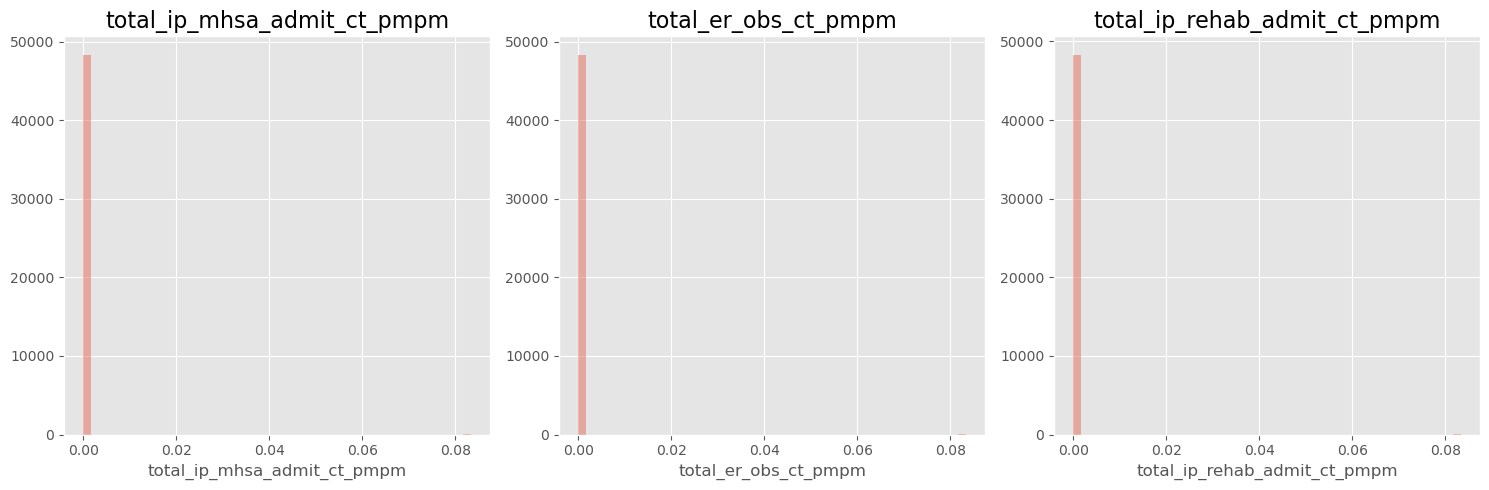

In [345]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


sns.distplot(training['total_ip_mhsa_admit_ct_pmpm'], ax=ax[0],kde=False)
ax[0].set_title('total_ip_mhsa_admit_ct_pmpm', fontsize=16)

sns.distplot(training['total_er_obs_ct_pmpm'],ax=ax[1],kde=False)
ax[1].set_title('total_er_obs_ct_pmpm', fontsize=16)

sns.distplot(training['total_ip_rehab_admit_ct_pmpm'],ax=ax[2],kde=False)
ax[2].set_title('total_ip_rehab_admit_ct_pmpm', fontsize=16)

plt.tight_layout()
plt.show()

In [346]:
training['total_ip_mhsa_admit_ct_pmpm'].value_counts(dropna=False)

0.000000    48287
0.083333       11
NaN             2
Name: total_ip_mhsa_admit_ct_pmpm, dtype: int64

In [347]:
training['total_ip_mhsa_admit_ct_pmpm'].fillna(value=0, inplace=True)
training['total_er_obs_ct_pmpm'].fillna(value=0, inplace=True)
training['total_ip_rehab_admit_ct_pmpm'].fillna(value=0, inplace=True)

holdout['total_ip_mhsa_admit_ct_pmpm'].fillna(value=0, inplace=True)
holdout['total_er_obs_ct_pmpm'].fillna(value=0, inplace=True)
holdout['total_ip_rehab_admit_ct_pmpm'].fillna(value=0, inplace=True)

In [348]:
Missing_Counts(training)[Missing_Counts(training)['ColumnName'].isin(total_col)]

,ColumnName,MissingCount,Percentage(%)


In [349]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)
0,dcsi_score,9,0.02
1,cci_score,48,0.10


<AxesSubplot:>

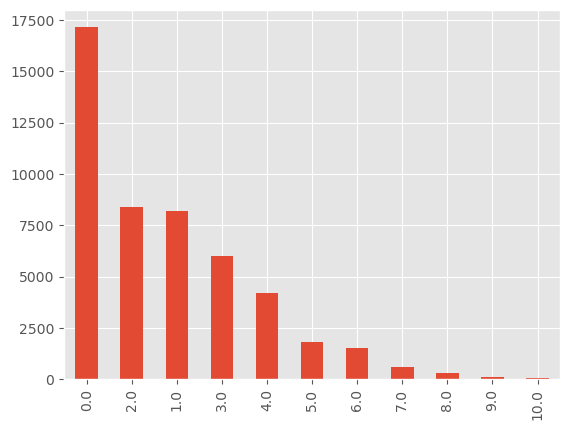

In [350]:
training['dcsi_score'].value_counts().plot(kind='bar')

In [351]:
training['dcsi_score'].fillna(value=0, inplace=True)

holdout['dcsi_score'].fillna(value=0, inplace=True)

<AxesSubplot:>

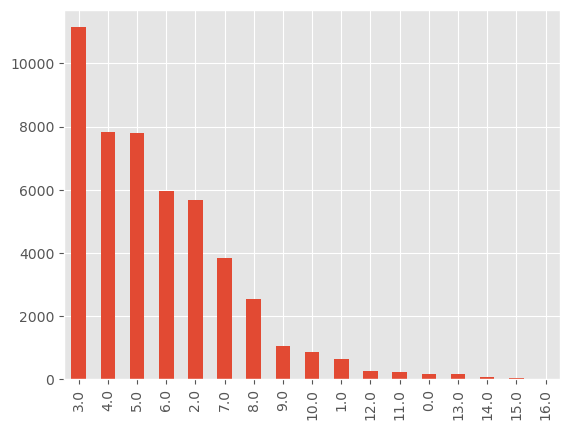

In [352]:
training['cci_score'].value_counts().plot(kind='bar')

In [353]:
training['cci_score'].fillna(value=0, inplace=True)

holdout['cci_score'].fillna(value=0, inplace=True)

In [354]:
Missing_Counts(training)

,ColumnName,MissingCount,Percentage(%)


In [355]:
training.isnull().values.any()

False

In [356]:
training.shape

(48300, 656)

In [357]:
holdout.shape

(12220, 656)

# Encoding

##### One-Hot Encoding if cardinal of variables less than 5
##### Hash Encoding if cardinal of variables more than 5(include)

In [358]:
from category_encoders import HashingEncoder

In [359]:
training.select_dtypes(include=['object'])

,cons_mobplus,cms_ra_factor_type_cd,rwjf_drinkwater_violate_ind,cons_homstat,cms_orig_reas_entitle_cd,sex_cd,lang_spoken_cd,rucc_category,cms_race_cd
0,M,CN,1.0,R,0.0,M,ENG,3-Metro,White (non-Hispanic)
1,M,CN,0.0,Y,0.0,F,ENG,1-Metro,American Indian or Alaska Native
2,S,CN,0.0,U,0.0,F,Unknown,2-Metro,White (non-Hispanic)
3,U,CF,1.0,U,0.0,F,Unknown,2-Metro,Black (non-Hispanic)
4,U,CP,0.0,U,1.0,M,Unknown,5-Nonmetro,White (non-Hispanic)
...,...,...,...,...,...,...,...,...,...
48295,U,CN,0.0,U,1.0,M,ENG,9-Nonmetro,White (non-Hispanic)
48296,M,E,0.0,R,0.0,F,ENG,3-Metro,White (non-Hispanic)
48297,M,CN,1.0,Y,1.0,F,Unknown,1-Metro,White (non-Hispanic)
48298,S,CN,1.0,Y,0.0,M,Unknown,3-Metro,White (non-Hispanic)


In [360]:
training['cons_mobplus'].unique()

array(['M', 'S', 'U', 'P'], dtype=object)

In [361]:
training = pd.get_dummies(training, drop_first = True, columns = ['cons_mobplus'])

In [362]:
training.shape

(48300, 658)

In [363]:
training

,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,rwjf_homicides_rate,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,5.564374,...,0.0,0.08,33511.0,0.0,0.00,9.1,0.726196,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4.209187,...,0.0,0.00,176797.0,0.0,0.00,6.8,0.670459,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,11.710056,...,0.0,0.00,380673.0,0.0,0.00,8.3,0.879186,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,7.268136,...,0.0,0.00,267696.0,0.0,0.00,7.3,0.746201,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,5.564374,...,0.0,0.00,19095.0,0.0,0.25,6.9,0.726196,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.16,5.564374,...,0.0,0.00,13483.0,0.0,0.00,8.0,0.726196,0,0,1
48296,0.0,0.0,0.0,0.0,0.0,0.0,1.86,0.0,0.00,5.054010,...,0.0,0.00,89970.0,0.0,0.00,8.1,0.640230,0,0,0
48297,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,8.726630,...,0.0,0.00,4434257.0,0.0,0.16,7.3,0.607490,0,0,0
48298,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4.704879,...,0.0,0.08,203629.0,0.0,0.00,5.7,0.737316,0,1,0


In [364]:
holdout = pd.get_dummies(holdout, drop_first = True, columns = ['cons_mobplus'])

In [365]:
holdout.shape

(12220, 658)

In [366]:
training['cms_ra_factor_type_cd'].unique()

array(['CN', 'CF', 'CP', 'E', 'No adjustment', 'D', 'C2', 'SE'],
      dtype=object)

In [367]:
training = pd.concat([HashingEncoder(cols='cms_ra_factor_type_cd', n_components=3).fit_transform(training['cms_ra_factor_type_cd']), training], axis=1)

In [368]:
training.shape

(48300, 661)

In [369]:
training

,col_0,col_1,col_2,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.08,33511.0,0.0,0.00,9.1,0.726196,0,0,0
1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,176797.0,0.0,0.00,6.8,0.670459,0,0,0
2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,380673.0,0.0,0.00,8.3,0.879186,0,1,0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,267696.0,0.0,0.00,7.3,0.746201,0,0,1
4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,19095.0,0.0,0.25,6.9,0.726196,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,13483.0,0.0,0.00,8.0,0.726196,0,0,1
48296,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.86,...,0.0,0.00,89970.0,0.0,0.00,8.1,0.640230,0,0,0
48297,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,4434257.0,0.0,0.16,7.3,0.607490,0,0,0
48298,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.08,203629.0,0.0,0.00,5.7,0.737316,0,1,0


In [370]:
training = training.rename(columns={'col_0': 'cms_ra_factor_type_cd_0', 'col_1': 'cms_ra_factor_type_cd_1', 'col_2': 'cms_ra_factor_type_cd_2'})

In [371]:
training

,cms_ra_factor_type_cd_0,cms_ra_factor_type_cd_1,cms_ra_factor_type_cd_2,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.08,33511.0,0.0,0.00,9.1,0.726196,0,0,0
1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,176797.0,0.0,0.00,6.8,0.670459,0,0,0
2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,380673.0,0.0,0.00,8.3,0.879186,0,1,0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,267696.0,0.0,0.00,7.3,0.746201,0,0,1
4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,19095.0,0.0,0.25,6.9,0.726196,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,13483.0,0.0,0.00,8.0,0.726196,0,0,1
48296,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.86,...,0.0,0.00,89970.0,0.0,0.00,8.1,0.640230,0,0,0
48297,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,4434257.0,0.0,0.16,7.3,0.607490,0,0,0
48298,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.08,203629.0,0.0,0.00,5.7,0.737316,0,1,0


In [372]:
training = training.drop('cms_ra_factor_type_cd', axis = 1)

In [373]:
holdout = pd.concat([HashingEncoder(cols='cms_ra_factor_type_cd', n_components=3).fit_transform(holdout['cms_ra_factor_type_cd']), holdout], axis=1)

In [374]:
holdout = holdout.rename(columns={'col_0': 'cms_ra_factor_type_cd_0', 'col_1': 'cms_ra_factor_type_cd_1', 'col_2': 'cms_ra_factor_type_cd_2'})

In [375]:
holdout = holdout.drop('cms_ra_factor_type_cd', axis = 1)

In [376]:
holdout.shape

(12220, 660)

In [377]:
training['rwjf_drinkwater_violate_ind'].unique()

array([1.0, 0.0, 'Unknown'], dtype=object)

In [378]:
training = pd.get_dummies(training, drop_first = True, columns = ['rwjf_drinkwater_violate_ind'])

In [379]:
training

,cms_ra_factor_type_cd_0,cms_ra_factor_type_cd_1,cms_ra_factor_type_cd_2,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,...,atlas_totalpopacs,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U,rwjf_drinkwater_violate_ind_1.0,rwjf_drinkwater_violate_ind_Unknown
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,33511.0,0.0,0.00,9.1,0.726196,0,0,0,1,0
1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,176797.0,0.0,0.00,6.8,0.670459,0,0,0,0,0
2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,380673.0,0.0,0.00,8.3,0.879186,0,1,0,0,0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,267696.0,0.0,0.00,7.3,0.746201,0,0,1,1,0
4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,19095.0,0.0,0.25,6.9,0.726196,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,13483.0,0.0,0.00,8.0,0.726196,0,0,1,0,0
48296,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.86,...,89970.0,0.0,0.00,8.1,0.640230,0,0,0,0,0
48297,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,4434257.0,0.0,0.16,7.3,0.607490,0,0,0,1,0
48298,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,203629.0,0.0,0.00,5.7,0.737316,0,1,0,1,0


In [380]:
training.shape

(48300, 661)

In [381]:
holdout = pd.get_dummies(holdout, drop_first = True, columns = ['rwjf_drinkwater_violate_ind'])

In [382]:
holdout.shape

(12220, 661)

In [383]:
training['cons_homstat'].unique()

array(['R', 'Y', 'U', 'P', 'T'], dtype=object)

In [384]:
training = pd.concat([HashingEncoder(cols='cons_homstat', n_components=3).fit_transform(training['cons_homstat']), training], axis=1)

In [385]:
training = training.rename(columns={'col_0': 'cons_homstat_0', 'col_1': 'cons_homstat_1', 'col_2': 'cons_homstat_2'})

In [386]:
training = training.drop('cons_homstat', axis = 1)

In [387]:
training.shape

(48300, 663)

In [388]:
holdout = pd.concat([HashingEncoder(cols='cons_homstat', n_components=3).fit_transform(holdout['cons_homstat']), holdout], axis=1)

In [389]:
holdout = holdout.rename(columns={'col_0': 'cons_homstat_0', 'col_1': 'cons_homstat_1', 'col_2': 'cons_homstat_2'})

In [390]:
holdout = holdout.drop('cons_homstat', axis = 1)

In [391]:
training['cms_orig_reas_entitle_cd'].unique()

array([0.0, 1.0, 'Others', 3.0, 2.0], dtype=object)

In [392]:
training = pd.concat([HashingEncoder(cols='cms_orig_reas_entitle_cd', n_components=3).fit_transform(training['cms_orig_reas_entitle_cd']), training], axis=1)

In [393]:
training

,col_0,col_1,col_2,cons_homstat_0,cons_homstat_1,cons_homstat_2,cms_ra_factor_type_cd_0,cms_ra_factor_type_cd_1,cms_ra_factor_type_cd_2,rx_hum_19_pmpm_cost,...,atlas_totalpopacs,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U,rwjf_drinkwater_violate_ind_1.0,rwjf_drinkwater_violate_ind_Unknown
0,0,1,0,0,0,1,1,0,0,0.0,...,33511.0,0.0,0.00,9.1,0.726196,0,0,0,1,0
1,0,1,0,0,1,0,1,0,0,0.0,...,176797.0,0.0,0.00,6.8,0.670459,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0.0,...,380673.0,0.0,0.00,8.3,0.879186,0,1,0,0,0
3,0,1,0,1,0,0,1,0,0,0.0,...,267696.0,0.0,0.00,7.3,0.746201,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0.0,...,19095.0,0.0,0.25,6.9,0.726196,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,0,1,0,1,0,0,1,0,0,0.0,...,13483.0,0.0,0.00,8.0,0.726196,0,0,1,0,0
48296,0,1,0,0,0,1,0,1,0,0.0,...,89970.0,0.0,0.00,8.1,0.640230,0,0,0,0,0
48297,0,1,0,0,1,0,1,0,0,0.0,...,4434257.0,0.0,0.16,7.3,0.607490,0,0,0,1,0
48298,0,1,0,0,1,0,1,0,0,0.0,...,203629.0,0.0,0.00,5.7,0.737316,0,1,0,1,0


In [394]:
training = training.rename(columns={'col_0': 'cms_orig_reas_entitle_cd_0', 'col_1': 'cms_orig_reas_entitle_cd_1', 'col_2': 'cms_orig_reas_entitle_cd_2'})

In [395]:
training = training.drop('cms_orig_reas_entitle_cd', axis = 1)

In [396]:
training.shape

(48300, 665)

In [397]:
holdout = pd.concat([HashingEncoder(cols='cms_orig_reas_entitle_cd', n_components=3).fit_transform(holdout['cms_orig_reas_entitle_cd']), holdout], axis=1)

In [398]:
holdout = holdout.rename(columns={'col_0': 'cms_orig_reas_entitle_cd_0', 'col_1': 'cms_orig_reas_entitle_cd_1', 'col_2': 'cms_orig_reas_entitle_cd_2'})

In [399]:
holdout = holdout.drop('cms_orig_reas_entitle_cd', axis = 1)

In [400]:
training['sex_cd'].unique()

array(['M', 'F'], dtype=object)

In [401]:
training = pd.get_dummies(training, drop_first = True, columns = ['sex_cd'])

In [402]:
training

,cms_orig_reas_entitle_cd_0,cms_orig_reas_entitle_cd_1,cms_orig_reas_entitle_cd_2,cons_homstat_0,cons_homstat_1,cons_homstat_2,cms_ra_factor_type_cd_0,cms_ra_factor_type_cd_1,cms_ra_factor_type_cd_2,rx_hum_19_pmpm_cost,...,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U,rwjf_drinkwater_violate_ind_1.0,rwjf_drinkwater_violate_ind_Unknown,sex_cd_M
0,0,1,0,0,0,1,1,0,0,0.0,...,0.0,0.00,9.1,0.726196,0,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0,0.0,...,0.0,0.00,6.8,0.670459,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0.0,...,0.0,0.00,8.3,0.879186,0,1,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0.0,...,0.0,0.00,7.3,0.746201,0,0,1,1,0,0
4,0,1,0,1,0,0,0,0,1,0.0,...,0.0,0.25,6.9,0.726196,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,0,1,0,1,0,0,1,0,0,0.0,...,0.0,0.00,8.0,0.726196,0,0,1,0,0,1
48296,0,1,0,0,0,1,0,1,0,0.0,...,0.0,0.00,8.1,0.640230,0,0,0,0,0,0
48297,0,1,0,0,1,0,1,0,0,0.0,...,0.0,0.16,7.3,0.607490,0,0,0,1,0,0
48298,0,1,0,0,1,0,1,0,0,0.0,...,0.0,0.00,5.7,0.737316,0,1,0,1,0,1


In [403]:
training.shape

(48300, 665)

In [404]:
holdout = pd.get_dummies(holdout, drop_first = True, columns = ['sex_cd'])

In [405]:
holdout.shape

(12220, 665)

In [406]:
training['lang_spoken_cd'].unique()

array(['ENG', 'Unknown', 'SPA'], dtype=object)

In [407]:
holdout['lang_spoken_cd'].unique()

array(['ENG', 'Unknown', 'SPA'], dtype=object)

In [408]:
training = pd.get_dummies(training, drop_first = True, columns = ['lang_spoken_cd'])

In [409]:
training

,cms_orig_reas_entitle_cd_0,cms_orig_reas_entitle_cd_1,cms_orig_reas_entitle_cd_2,cons_homstat_0,cons_homstat_1,cons_homstat_2,cms_ra_factor_type_cd_0,cms_ra_factor_type_cd_1,cms_ra_factor_type_cd_2,rx_hum_19_pmpm_cost,...,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U,rwjf_drinkwater_violate_ind_1.0,rwjf_drinkwater_violate_ind_Unknown,sex_cd_M,lang_spoken_cd_SPA,lang_spoken_cd_Unknown
0,0,1,0,0,0,1,1,0,0,0.0,...,9.1,0.726196,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0.0,...,6.8,0.670459,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0.0,...,8.3,0.879186,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0.0,...,7.3,0.746201,0,0,1,1,0,0,0,1
4,0,1,0,1,0,0,0,0,1,0.0,...,6.9,0.726196,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,0,1,0,1,0,0,1,0,0,0.0,...,8.0,0.726196,0,0,1,0,0,1,0,0
48296,0,1,0,0,0,1,0,1,0,0.0,...,8.1,0.640230,0,0,0,0,0,0,0,0
48297,0,1,0,0,1,0,1,0,0,0.0,...,7.3,0.607490,0,0,0,1,0,0,0,1
48298,0,1,0,0,1,0,1,0,0,0.0,...,5.7,0.737316,0,1,0,1,0,1,0,1


In [410]:
training.shape

(48300, 666)

In [411]:
holdout = pd.get_dummies(holdout, drop_first = True, columns = ['lang_spoken_cd'])

In [412]:
holdout.shape

(12220, 666)

In [413]:
training['rucc_category'].unique()

array(['3-Metro', '1-Metro', '2-Metro', '5-Nonmetro', '4-Nonmetro',
       '6-Nonmetro', '7-Nonmetro', '8-Nonmetro', '9-Nonmetro'],
      dtype=object)

In [414]:
training = pd.concat([HashingEncoder(cols='rucc_category', n_components=3).fit_transform(training['rucc_category']), training], axis=1)

In [415]:
training

,col_0,col_1,col_2,cms_orig_reas_entitle_cd_0,cms_orig_reas_entitle_cd_1,cms_orig_reas_entitle_cd_2,cons_homstat_0,cons_homstat_1,cons_homstat_2,cms_ra_factor_type_cd_0,...,rwjf_food_env_inx,atlas_snapspth16,cons_mobplus_P,cons_mobplus_S,cons_mobplus_U,rwjf_drinkwater_violate_ind_1.0,rwjf_drinkwater_violate_ind_Unknown,sex_cd_M,lang_spoken_cd_SPA,lang_spoken_cd_Unknown
0,0,0,1,0,1,0,0,0,1,1,...,9.1,0.726196,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,1,0,1,...,6.8,0.670459,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,...,8.3,0.879186,0,1,0,0,0,0,0,1
3,0,1,0,0,1,0,1,0,0,1,...,7.3,0.746201,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0,0,0,...,6.9,0.726196,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,0,0,0,1,0,1,0,0,1,...,8.0,0.726196,0,0,1,0,0,1,0,0
48296,0,0,1,0,1,0,0,0,1,0,...,8.1,0.640230,0,0,0,0,0,0,0,0
48297,0,1,0,0,1,0,0,1,0,1,...,7.3,0.607490,0,0,0,1,0,0,0,1
48298,0,0,1,0,1,0,0,1,0,1,...,5.7,0.737316,0,1,0,1,0,1,0,1


In [416]:
training = training.rename(columns={'col_0': 'rucc_category_0', 'col_1': 'rucc_category_1', 'col_2': 'rucc_category_2'})

In [417]:
training.shape

(48300, 669)

In [418]:
training = training.drop('rucc_category', axis = 1)

In [419]:
holdout = pd.concat([HashingEncoder(cols='rucc_category', n_components=3).fit_transform(holdout['rucc_category']), holdout], axis=1)

In [420]:
holdout = holdout.drop('rucc_category', axis = 1)

In [421]:
holdout = holdout.rename(columns={'col_0': 'rucc_category_0', 'col_1': 'rucc_category_1', 'col_2': 'rucc_category_2'})

In [422]:
holdout.shape

(12220, 668)

In [423]:
training['cms_race_cd'].unique()

array(['White (non-Hispanic)', 'American Indian or Alaska Native',
       'Black (non-Hispanic)', 'Other', 'Hispanic',
       'Asian, Asian American, or Pacific Islander', 'Unknown'],
      dtype=object)

In [424]:
training = pd.concat([HashingEncoder(cols='cms_race_cd', n_components=3).fit_transform(training['cms_race_cd']), training], axis=1)

In [425]:
training = training.drop('cms_race_cd', axis = 1)

In [426]:
training = training.rename(columns={'col_0': 'cms_race_cd_0', 'col_1': 'cms_race_cd_1', 'col_2': 'cms_race_cd_2'})

In [427]:
training.shape

(48300, 670)

In [428]:
holdout = pd.concat([HashingEncoder(cols='cms_race_cd', n_components=3).fit_transform(holdout['cms_race_cd']), holdout], axis=1)

In [429]:
holdout = holdout.rename(columns={'col_0': 'cms_race_cd_0', 'col_1': 'cms_race_cd_1', 'col_2': 'cms_race_cd_2'})

In [430]:
holdout = holdout.drop('cms_race_cd', axis = 1)

In [431]:
holdout.shape

(12220, 670)

##### Drop highly correlated features (correlation coefficient >= 0.9)

In [432]:
corr_matrix = training.corr().abs()

In [433]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [434]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [435]:
to_drop

['cms_orig_reas_entitle_cd_2',
 'med_ip_snf_ds_clm',
 'total_ip_acute_ds_clm',
 'med_ambulance_ds_clm',
 'atlas_totalocchu',
 'rx_nonotc_pmpm_ct',
 'rwjf_premature_mortality',
 'total_physician_office_ds_clm',
 'cms_frailty_ind',
 'rx_nonbh_pmpm_ct',
 'total_outpatient_ds_clm',
 'total_urgent_care_ds_clm',
 'atlas_totalpopacs']

In [436]:
training.corr().abs().unstack().sort_values(ascending = False).drop_duplicates()

cms_race_cd_0                  cms_race_cd_0                      1.000000e+00
cms_frailty_ind                cms_orig_reas_entitle_cd_2         9.991653e-01
atlas_totalpopest2016          atlas_totalpopacs                  9.980018e-01
cms_orig_reas_entitle_cd_1     cms_orig_reas_entitle_cd_2         9.958460e-01
cms_frailty_ind                cms_orig_reas_entitle_cd_1         9.950142e-01
                                                                      ...     
med_ip_snf_ds_clm              cons_homstat_2                     4.213497e-07
cnt_cp_vat_9                   rx_hum_74_pmpm_cost                3.678831e-07
total_ip_mhsa_admit_days_pmpm  rwjf_drinkwater_violate_ind_1.0    3.333760e-07
cms_ma_risk_score_nbr          rwjf_teen_births_rate              2.207249e-07
rx_days_since_last_script      total_ip_mhsa_allowed_pmpm_cost    4.526777e-08
Length: 224077, dtype: float64

In [437]:
training = training.drop('cms_orig_reas_entitle_cd_2', axis = 1)
holdout = holdout.drop('cms_orig_reas_entitle_cd_2', axis = 1)

In [438]:
training = training.drop('atlas_totalpopacs', axis = 1)
holdout = holdout.drop('atlas_totalpopacs', axis = 1)

In [439]:
training = training.drop('cms_orig_reas_entitle_cd_1', axis = 1)
holdout = holdout.drop('cms_orig_reas_entitle_cd_1', axis = 1)

In [440]:
training = training.drop('rwjf_population', axis = 1)
holdout = holdout.drop('rwjf_population', axis = 1)

In [441]:
training = training.drop('med_outpatient_ds_clm', axis = 1)
holdout = holdout.drop('med_outpatient_ds_clm', axis = 1)

In [442]:
training = training.drop('total_ambulance_ds_clm', axis = 1)
holdout = holdout.drop('total_ambulance_ds_clm', axis = 1)

In [443]:
training = training.drop('total_urgent_care_ds_clm', axis = 1)
holdout = holdout.drop('total_urgent_care_ds_clm', axis = 1)

In [444]:
training = training.drop('rwjf_premature_death_rate', axis = 1)
holdout = holdout.drop('rwjf_premature_death_rate', axis = 1)

In [445]:
training = training.drop('total_ip_acute_ds_clm', axis = 1)
holdout = holdout.drop('total_ip_acute_ds_clm', axis = 1)

In [446]:
training = training.drop('rx_nonspecialty_pmpm_ct', axis = 1)
holdout = holdout.drop('rx_nonspecialty_pmpm_ct', axis = 1)

In [447]:
training = training.drop('rx_nonotc_pmpm_ct', axis = 1)
holdout = holdout.drop('rx_nonotc_pmpm_ct', axis = 1)

In [448]:
training = training.drop('total_ip_snf_ds_clm', axis = 1)
holdout = holdout.drop('total_ip_snf_ds_clm', axis = 1)

In [449]:
training = training.drop('total_physician_office_ds_clm', axis = 1)
holdout = holdout.drop('total_physician_office_ds_clm', axis = 1)

# Machine Learning Models

In [504]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(training, target, test_size = 0.2, random_state = 0)

In [505]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_scaled_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_scaled_val = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)
X_scaled_holdout = pd.DataFrame(scaler.transform(holdout), columns = holdout.columns)

In [506]:
from sklearn.metrics import confusion_matrix, classification_report

### Logistic Regression

In [507]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state= 0).fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_validate

lr1_predicted = cross_validate(lr1, X = X_scaled_train, y = y_train, scoring = 'roc_auc', cv = 10)
lr1_predicted['test_score']

array([0.71399502, 0.65635476, 0.69813287, 0.69038469, 0.70713678,
       0.68763886, 0.70736164, 0.68955334, 0.70763243, 0.70538594])

In [508]:
lr1_predicted['test_score'].mean()

0.6963576318895882

In [509]:
y_pred_lr1 = lr1.predict(X_scaled_val)

In [510]:
confusion_matrix_lr1 = confusion_matrix(y_val, y_pred_lr1)
confusion_matrix_lr1

array([[9235,   18],
       [ 404,    3]], dtype=int64)

In [511]:
print(classification_report(y_val, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9253
           1       0.14      0.01      0.01       407

    accuracy                           0.96      9660
   macro avg       0.55      0.50      0.50      9660
weighted avg       0.92      0.96      0.94      9660



### Random Forest

In [512]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state = 2).fit(X_train, y_train)

rf1_predicted = cross_validate(rf1, X = X_train, y = y_train, scoring = 'roc_auc', cv = 10)
rf1_predicted['test_score']

array([0.71580183, 0.66118847, 0.68927305, 0.63609832, 0.66476565,
       0.65708318, 0.70080269, 0.63932317, 0.68446468, 0.67365958])

In [513]:
rf1_predicted['test_score'].mean()

0.6722460613211789

In [514]:
y_pred_rf1 = rf1.predict(X_val)

In [515]:
confusion_matrix_rf1 = confusion_matrix(y_val, y_pred_rf1)
confusion_matrix_rf1

array([[9253,    0],
       [ 407,    0]], dtype=int64)

In [516]:
print(classification_report(y_val, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9253
           1       0.00      0.00      0.00       407

    accuracy                           0.96      9660
   macro avg       0.48      0.50      0.49      9660
weighted avg       0.92      0.96      0.94      9660



### XGBoost

In [517]:
import xgboost
from xgboost import XGBClassifier

xgb1 = XGBClassifier(n_estimators = 1000, random_state = 1).fit(X_train, y_train)

xgb1_predicted = cross_validate(xgb1, X = X_train, y = y_train, scoring = 'roc_auc', cv = 10)
xgb1_predicted['test_score']

array([0.69568316, 0.67198256, 0.69205055, 0.70013207, 0.6852414 ,
       0.66742201, 0.68539817, 0.6742945 , 0.72105754, 0.69956726])

In [518]:
xgb1_predicted['test_score'].mean()

0.6892829208532589

In [519]:
y_pred_xgb1 = xgb1.predict(X_val)

In [520]:
confusion_matrix_xgb1 = confusion_matrix(y_val, y_pred_xgb1)
confusion_matrix_xgb1

array([[9244,    9],
       [ 403,    4]], dtype=int64)

In [521]:
print(classification_report(y_val, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9253
           1       0.31      0.01      0.02       407

    accuracy                           0.96      9660
   macro avg       0.63      0.50      0.50      9660
weighted avg       0.93      0.96      0.94      9660

